# Personal Loan Campaign Modelling

## Dataset Attributes:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

import statsmodels.api as sm

## Load and Explore the Data

In [2]:
data = pd.read_csv('Loan_Modelling.csv') #load and read the csv file
df= data.copy() #making a copy to avoid changes to data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
#checking the shape of the dataset
np.random.seed(85) 
df.sample(10) #loading random 10 rows

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3411,3412,63,37,118,94010,1,2.0,1,427,0,0,0,0,0
4241,4242,34,9,40,95054,4,2.0,2,0,0,0,0,1,1
2799,2800,64,39,85,94720,4,3.4,2,200,0,0,0,1,0
4132,4133,61,36,133,90266,1,2.6,1,0,0,0,0,1,0
3220,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0
1614,1615,47,23,89,94920,1,2.6,2,0,0,1,1,1,1
4992,4993,30,5,13,90037,4,0.5,3,0,0,0,0,0,0
3375,3376,43,18,88,90089,4,1.1,2,0,0,0,0,1,0
4023,4024,51,25,175,90089,3,0.7,1,312,1,0,0,0,0
793,794,24,-2,150,94720,2,2.0,1,0,0,0,0,1,0


In [3]:
df.info() # looking at the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.Personal_Loan.unique()

array([0, 1], dtype=int64)

* All the variables are of numerical datatype and there are no missing values
* The Dependent variable is Personal Loan. We see that it has only two values; `0 & 1`. As it is a binary class variable, we will convert to category for further processing.
* Education and Family have numerical inputs label-coded from differnet categories and should be in category datatype
* Securities_account, CD_Account, Online and CreditCard are int datatype but with Binary inputs
    * {i.e 0 = No and 1 = Yes} 
* The inputs can also be considered as two categories and hence for better model and analysis, we will convert them to categorical datatype    
* Zipcode signifies the area where the customer lives and we cannot use it in its Numerical Form. Hence we will extract relevant information from it and drop the column


## Feature Engineering:

* Checking the different values in the ZIPCode variable, we conclude that all the customers in this dataset are from the State of California. 
* We will extract the county where the customer is currently residing.

In [5]:
# checking the number of uniques in the zip code
df['ZIPCode'].nunique()

467

* There are 467 unique values in zip code.
* In US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district. 
* Hence we will group them based on the first two digits


In [6]:
df['ZIPCode'] = df['ZIPCode'].astype(str)
df['ZIPCode'] = df['ZIPCode'].str[0:2]
df['ZIPCode'].nunique()

7

* Now the unique ZIPCodes are reduces to seven groups

## Fixing DataTypes

In [7]:
df.drop(['ID'],axis=1,inplace=True)
#Dropping ID as its not relevant

In [8]:
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')
df['Personal_Loan'] = df['Personal_Loan'].astype('category')
df['Securities_Account'] = df['Securities_Account'].astype('category')
df['CD_Account'] = df['CD_Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df['ZIPCode'] = df['ZIPCode'].astype('category')

df.info() #rechecking the datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.6 KB


* We now have 5000 rows and 13 columns and we see that the memory has also reduced

## Summary of Numerical Columns

In [9]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


* The Mean and Median for Age is almost equal ie approx 45 yrs 
* Experience Column has a min value -3, which is could be an error and needs to be checked.
* Mean Income is greater than median income indicating skewness. We also see a very high Max value suggesting outliers.
* CCavg minimum value is  0.0 dollars; suggesting that the customer may not have any credit cards. The Mean and median for this variable are fairly close.
* Similarly, the Minimum value for Mortgage is 0.0 for atleast 50% of the customers; this could mean the customers dont own a home.


## Processing Columns

In [10]:
df[df['Experience'] < 0]['Experience'].count() #finding columns with -ve experience values

52

In [11]:
df1=df[(df.Experience<0)] 
print(f"The unique Negative Experience Array= {df1['Experience'].unique()}")
df1['Age'].value_counts(ascending=True)#finding the mean and median for w.r.t Age 

The unique Negative Experience Array= [-1 -2 -3]


26     1
28     1
29     3
23    12
24    17
25    18
Name: Age, dtype: int64

In [12]:
#Let's check the actual experience distribution for the ages above
df2=df[(df.Experience>=0)][df.Age<30] #Since the age for -ve experience values is less than 30 yrs
df2.groupby(['Age']).agg([np.mean,np.median]).Experience

,mean,median
Age,,
24,0.000000,0
25,0.514286,1
26,0.987013,1
27,1.923077,2
28,3.009804,3
29,3.833333,4


* We see that the mean and median for the above ages are approximately equal.
* We are missing information for Age 23 yrs old, suggesting that the data has only -ve values for experience. 
* Replacing with either Mean or Median for corresponding ages will lose information for ages 23 & 24. 
* Hence we will consider this issue as an data entry error and remove the negative sign from the values, thus making them positive experience values

In [13]:
multiplier = -1
for i in range(len(df)):
    if df.Experience[i]<0:
        df.Experience[i]=(df.Experience[i]*multiplier)
(df.Experience<0).value_counts()         

False    5000
Name: Experience, dtype: int64

* All negative experience values have been corrected.

## Missing Values :

In [14]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in this dataset

## Exploratory Data Analysis:
### Univariate Analysis - Numerical Columns:

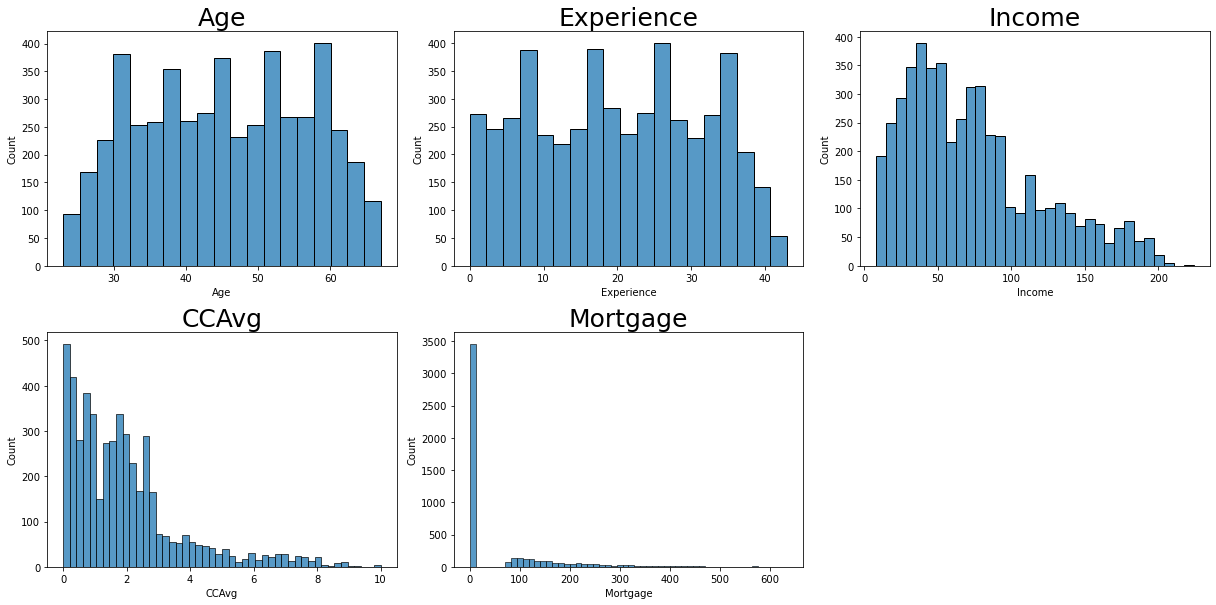

In [15]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

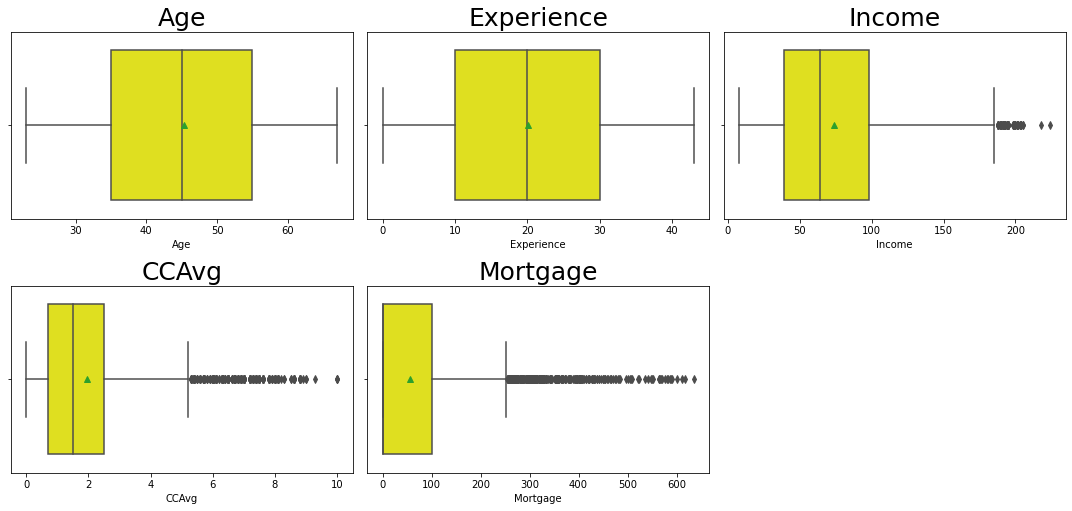

In [16]:
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

**Observations**:
* Age and Experience are almost normally distributed and look quite similar. This suggests a correlation between the two.
* There is skewness is the other three variables:
* Income:
    - Income shows the annual salary earned by the customer and its right-skewed in distribution.Majority of customers have income less than 100K, but there are several observation in the higher end.

* Credit Card Average: 
    - CCAvg has several outliers in the higher end and is heavily right-skewed. Almost 75% of customers have an average of less than 2.5(in thousand dollars). This suggests that some customers have very high charges compared to the rest

* Mortgage 
    - The distribution in Mortgage variable is also heavily skewed. Almost 50 % of customers dont have a mortgage,indicating they dont own a home. We will have to analyse the mortgage for customers who only own a home to understand the distributions

In [17]:
df3= df[(df.Mortgage>0)]

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

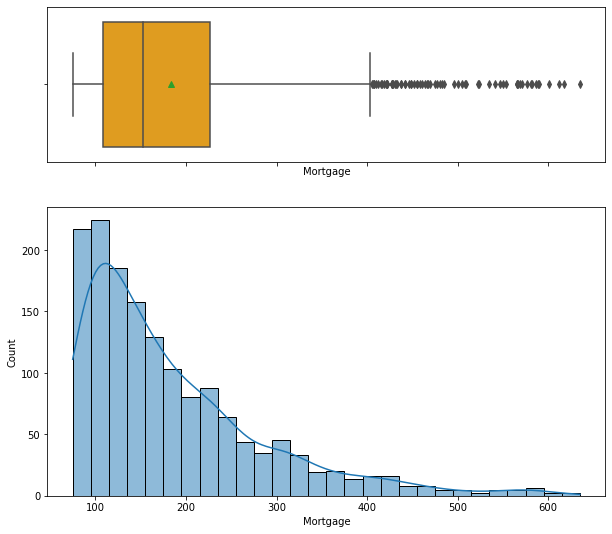

In [18]:
fig,(ax_box,ax_hist) = plt.subplots(2,1,sharex=True ,
                                        figsize=(10,9),
                                        gridspec_kw = {"height_ratios": (.35, .65)})
sns.boxplot(df3.Mortgage, ax=ax_box, showmeans=True, color='orange')
sns.histplot(df3.Mortgage, ax=ax_hist,kde=True)

**Insights**:
* The distribution is again right-skewed with an increased Mean of around 183K dollars.
* There are again several outliers in the higher end. We suspect this could be due to the location of the homes, as higher land value could mean higher mortgage price. Over 75% of the customers have Mortgageare below 230K dollars.

### Univariate Analysis - Categorical Columns:

In [19]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

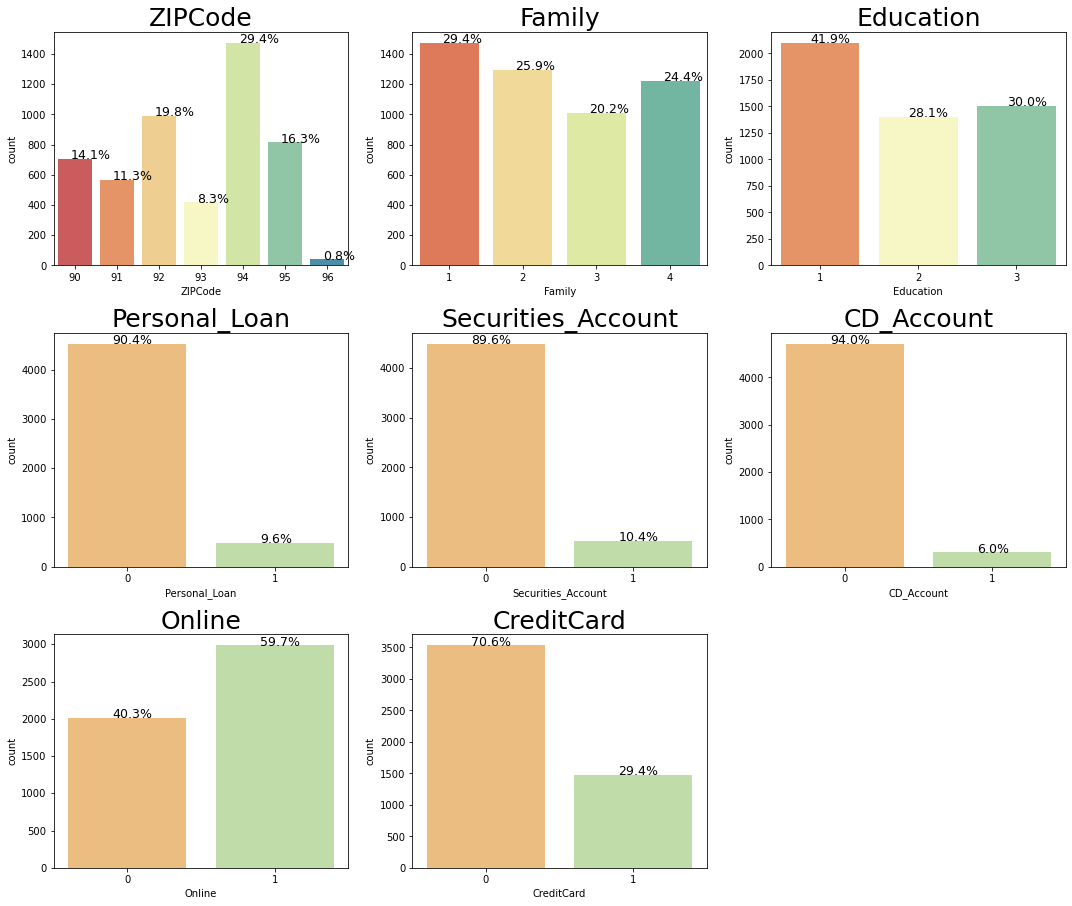

In [20]:
plt.figure(figsize=(15,75))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12.5,color='black') # To annonate
plt.show()

**Observations**:
* 29.4% of customers are from region 94 followed by reion 92 at19.8%
* 29.4 % of customers are of single-family household, with Family variable having four unique values.
* Education has three unique values with 41.9% of at Undergrad level(1).
* Personal_Loans is the Dependent variable and we see that there is heavy imbalance. Only 9.6% of customers in the data have accepted a loan from the previous campaign
* 89.6% of customers dont have a Securities account whereas 94% of customers dont have a CD account.
* We that 59.7 % of customers use the bank's online facilities and about 70.6% dont have credit cards issue by another bank.

### Correlation Matrix

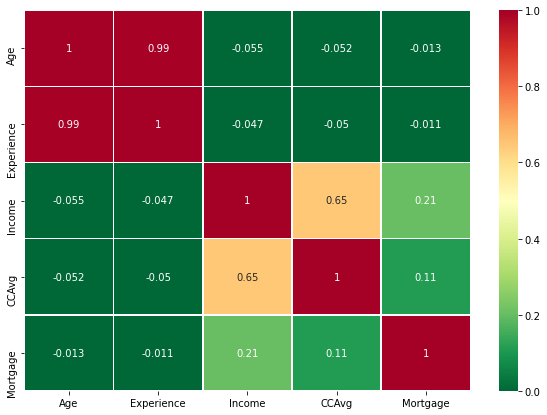

In [21]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=1, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

**Observations**:
* Age and Experience have the highest correlation at 0.99. We suspect multi-collinearity between these variables
* Income and CC_Avg have the next highest positive correlation at 0.65. This suggests that customers with higher income have higher Credit card charges.
* Income and CCAvg have a positive correlation with Mortgage.

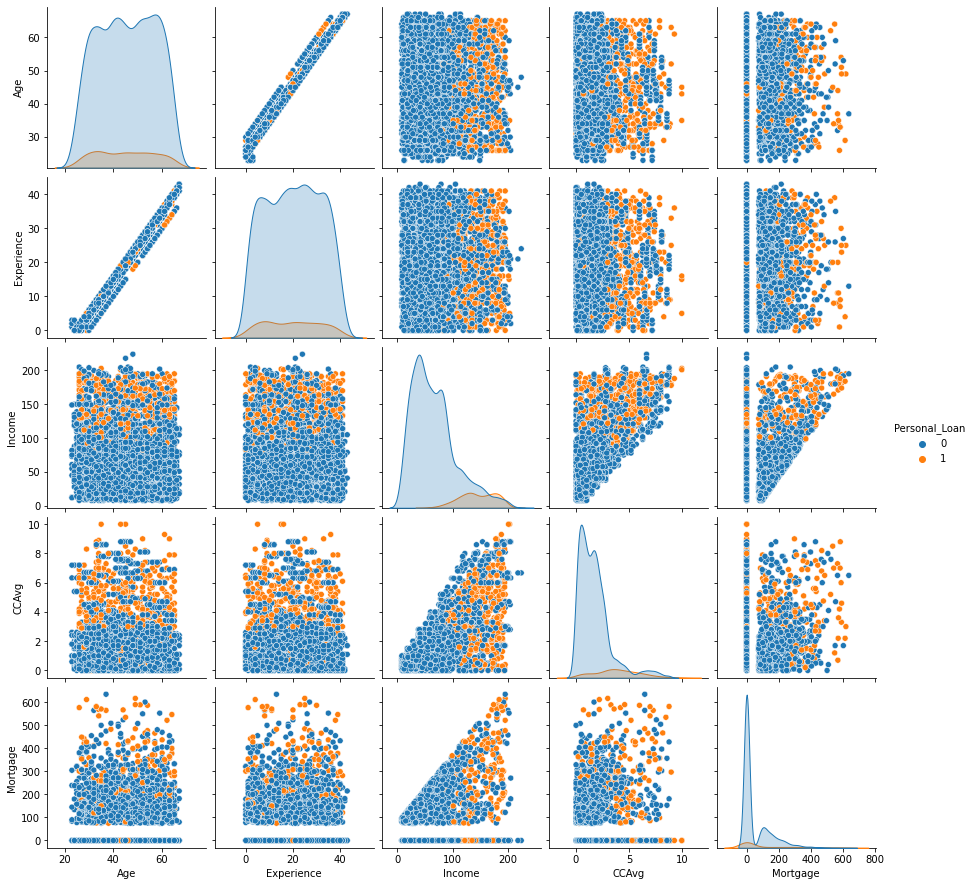

In [22]:
sns.pairplot(data=df,hue='Personal_Loan')

**Observations:**
* The pair plot shows a more varying distribution in the variables between customers who took a loan and those who didnt. 
* We see again that the distribution for Age and Experience is very similar. This could suggest possible multicollinearity
* There are overlaps that make it difficults to interpret who has personal loans and who doesnt, hence we will analyse futher with other plots

## Bivariate Analysis

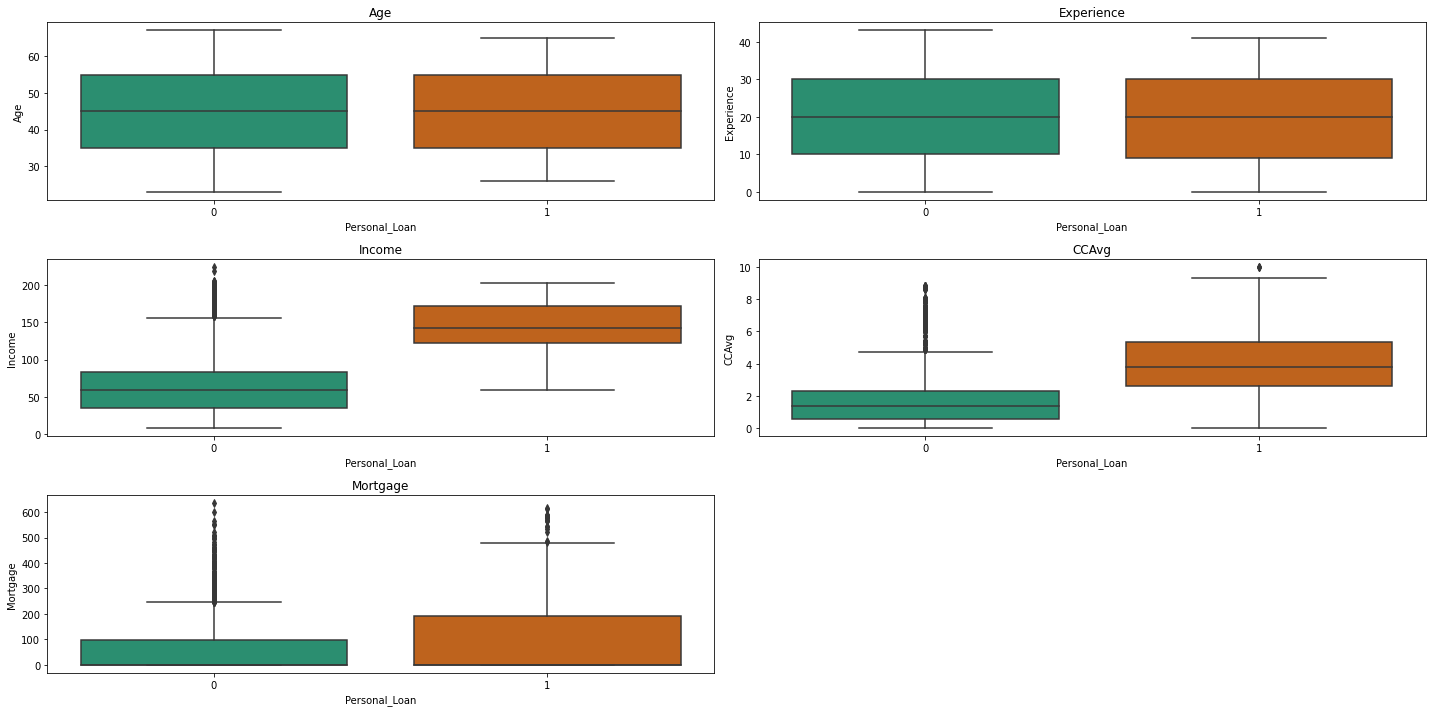

In [23]:
# For all numerical variables with Personal_Loan
plt.figure(figsize=(20,10))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['Personal_Loan'],df[variable],palette="Dark2")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations**:
* The mean values for Age is the same for both categories of Personal Loans
* Similarly the mean values for Experience is also almost equal for both categories of Personal Loan. Both these variables dont have any outliers

* Customers who have Personal Loans also have high Mean **Income and CreditCard Average** compared to customers who dont have a loan. Interesting we see several outliers in the higher end for both these variables in Class **0**. 

* The mean value for Mortgage at both levels in 0.0(in dollars). This is because majority of the customers dont have Mortgages. However, we see that customers with higher mortgages have Personal loans. But, we also see that there are several outliers in the high end again for customers who dont have a loan.

* The above plot, suggests a correlation between Income,CCavg and Mortgage. Customers with high values for these variables have taken loans. This could suggests them as possible features of customers that can be targeted.

In [24]:
#Stacked plot of categorical variables with Personal Loans
def stacked_plot(x):
    sns.set(palette='Accent')
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

Personal_Loan     0    1   All
ZIPCode                       
90              636   67   703
91              510   55   565
92              894   94   988
93              374   43   417
94             1334  138  1472
95              735   80   815
96               37    3    40
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


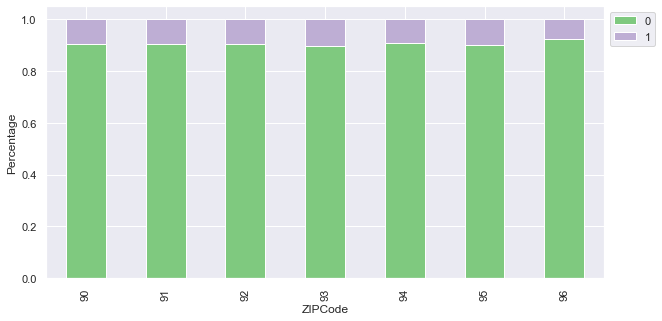

In [25]:
stacked_plot(df.ZIPCode)

* All the sub-regions show fairly equal distribution among customers who purchased a loan

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


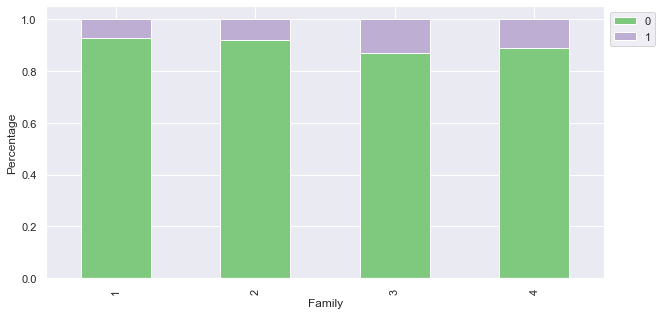

In [26]:
stacked_plot(df.Family)


- More Customers with larger family size(3&4) have Personal Loans. 

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


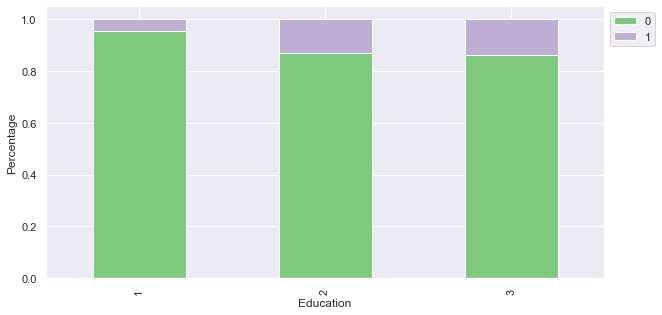

In [27]:
stacked_plot(df.Education)

* Customers with higher Education levels have taken Personal Loans.

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


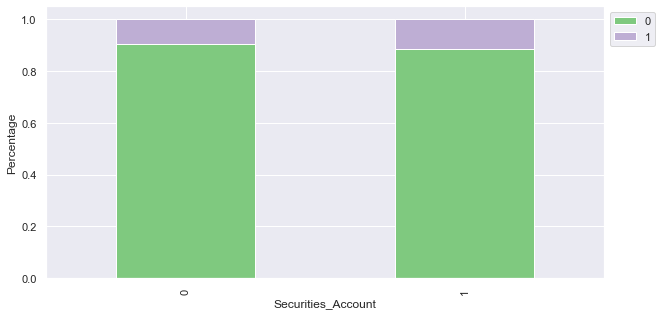

In [28]:
stacked_plot(df.Securities_Account)

* Majority of the customers dont have a Securities Account out of which 420 have Personal loans
* Remaining customers who do have an account; only 60 have loans. 

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


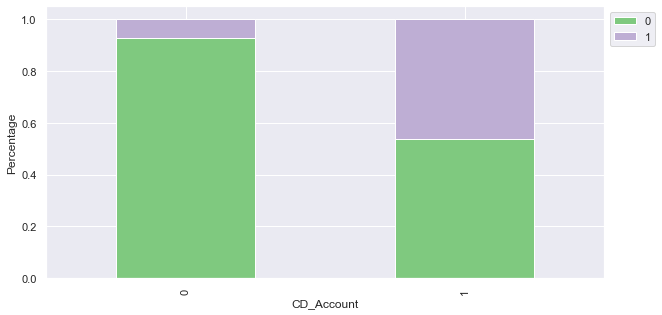

In [29]:
stacked_plot(df.CD_Account)

* In the 302 customers have a CD_account, almost 50% have a Personal Loan
* This suggests that customers who have a CD_account are likely to buy loans and can be a possible target feature.

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


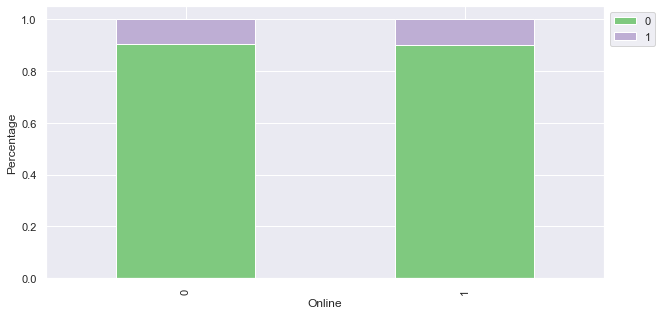

In [30]:
stacked_plot(df.Online)

* 10% of customers in both classes of Online variable have purchased loans

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


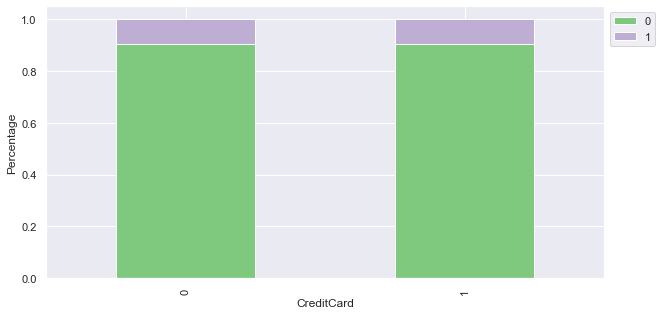

In [31]:
stacked_plot(df.CreditCard)

* We have more customers who dont have Credit card with other banks
* Again 10% of customers in both Credit Card classes have purchased loans

## Multi-variate Analysis

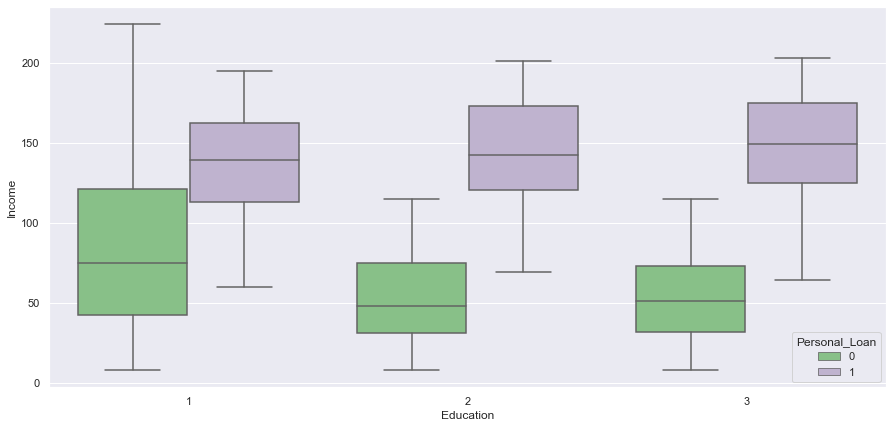

In [32]:
#Income Vs Education Vs Personal_Loan
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y='Income',x='Education',hue='Personal_Loan')
plt.show()

* As Education level increases, Mean Income also increases.
* Customers with Education level 2 and 3 who have personal loans have a much higher mean income than Education level 1 customers

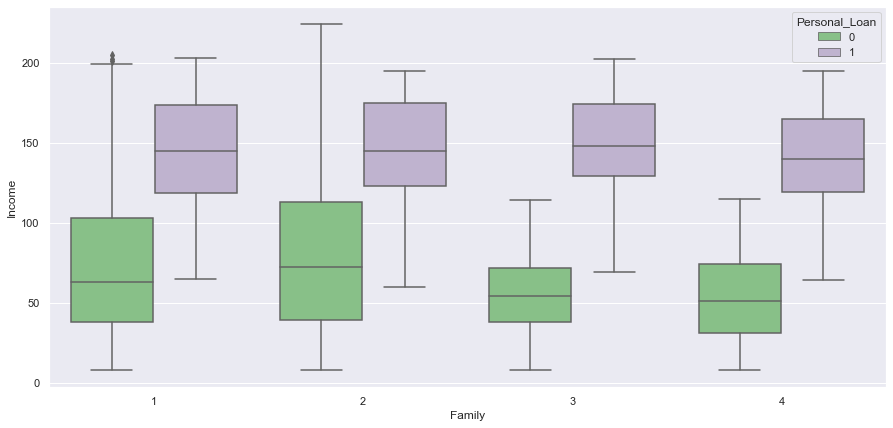

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y='Income',x='Family',hue='Personal_Loan')
plt.show()

* Income level among all Family groups is significantly higher for customers who have a Personal Loan. 

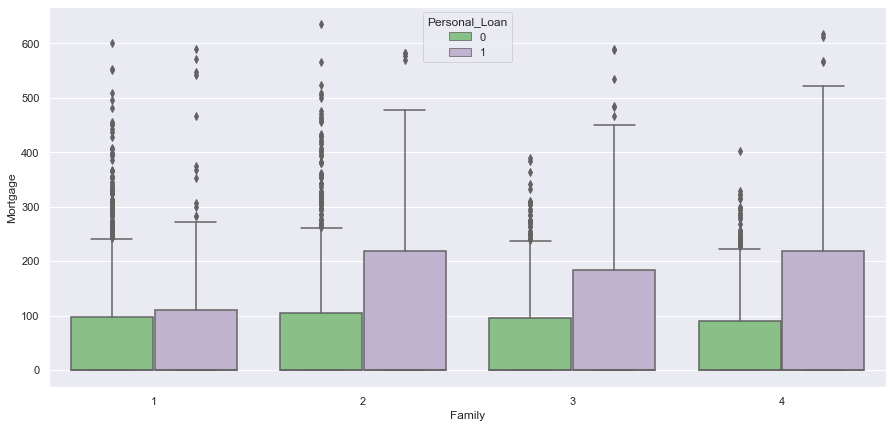

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y='Mortgage',x='Family',hue='Personal_Loan')
plt.show()

* There are several outliers in Family size 1 and 2 for customers who dont have a Personal loan compares to the rest.
* We also see that as Family size increases, the Mortgage value also rises and the customers have Personal Loans

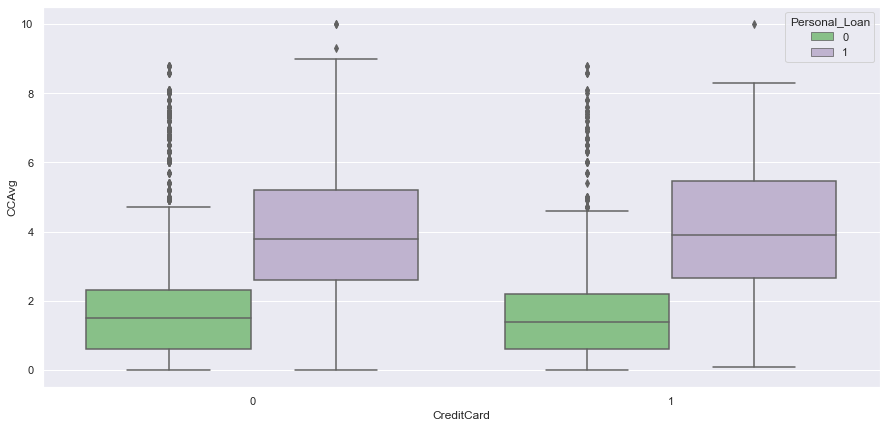

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y='CCAvg',x='CreditCard',hue='Personal_Loan')
plt.show()

* Customers who have Personal loans have a higher credit card Average.
* There are several outliers in customers who dont have personal loans. 

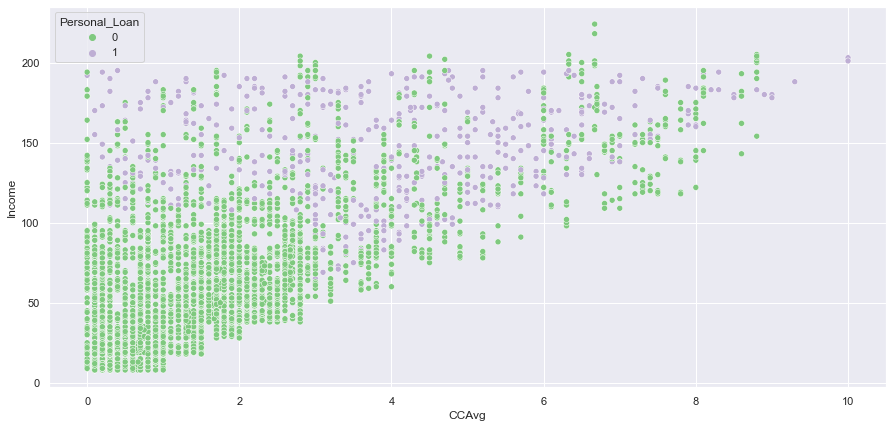

In [36]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Income',x='CCAvg',hue='Personal_Loan')
plt.show()

**Observations**:
* More Customers with higher income and CCAvg `>2.5(in thousand dollars)` have personal loans.

## Data Pre-Processing:

### Outliers Treatment:
* Income, CCAvg and Mortgage have very high outliers in the higher end and must be treated.
* Since we will also be creating a Decision Tree model(Decision Trees are not influenced by outliers) 
  we will make a copy of the dataset before proceeding with outlier treatment.

In [37]:
df1=df.copy() # new copy for Decision Tree model

In [38]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list): # treat outliers in numerical column of Dataframe
    
    for c in col_list:
        df = treat_outliers(df,c)
        
        
    return df 

In [39]:
no_treatment = {'Age','Experience'} # These two variables dont have outliers
numerical_col = [ele for ele in Uni_num if ele not in no_treatment] 
#Applying outlier treatment
df = treat_outliers_all(df,numerical_col)

* All Outliers are treated

## Model Building 

### Model Evaluation Criterion 
#### Model can make two kinds of wrong predictions: 
1. Wrongly Identify customers as loan borrowers but they are not - False Positive
2. Wrongly identifying customers as not borrowers but they actually buy loans - False Negative

* Since the Banks wants to identify all potential customers who will purchase a loan, the False Negative value must be less.

#### How to reduce losses
* Recall is the Performance metric that must be improved.
* The Recall score must be maximised and greater the score the less the chance of missing potential customers.


#### Creating a Confusion Matrix

In [40]:
#Defining a function for Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
sns.set(font_scale=2.0) # to set font size for the matrix
def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
#Importing all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics #accuracy,confusion metrics, etc
from sklearn import datasets 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [42]:
## Defining X and Y variables
X = df.drop(['Personal_Loan'], axis=1) #dropping the dependent variable
Y = df[['Personal_Loan']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=29) # 70% train set and 30% test set


### Logistic Regression (with Sklearn library)

In [43]:
logreg = LogisticRegression(solver='saga',max_iter=1000,penalty='none',verbose=True,n_jobs=1,random_state=29)

# There arae several optimizer, we are using optimizer called as 'saga' with max_iter equal to 1000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

#Checking the Accuracy of the model:
print('\nAccuracy on train data:%.6f'%accuracy_score(y_train, pred_train) )
print('Accuracy on test data:%.6f' %accuracy_score(y_test, pred_test))
#checking the Recall metrics of the model:
print('\nRecall on train data:%.6f'%recall_score(y_train, pred_train) )
print('Recall on test data:%.6f'%recall_score(y_test, pred_test))
#checking the Precision metrics of model:
print("\nPrecision on training set : ",precision_score(y_train, pred_train))
print("Precision on test set : ",precision_score(y_test, pred_test))

print("\nF1 Score on training set : ",f1_score(y_train, pred_train))
print("F1 Score on test set : ",f1_score(y_test, pred_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds

Accuracy on train data:0.938000
Accuracy on test data:0.940000

Recall on train data:0.524781
Recall on test data:0.481752

Precision on training set :  0.7692307692307693
Precision on test set :  0.7764705882352941

F1 Score on training set :  0.6239168110918544
F1 Score on test set :  0.5945945945945946


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished


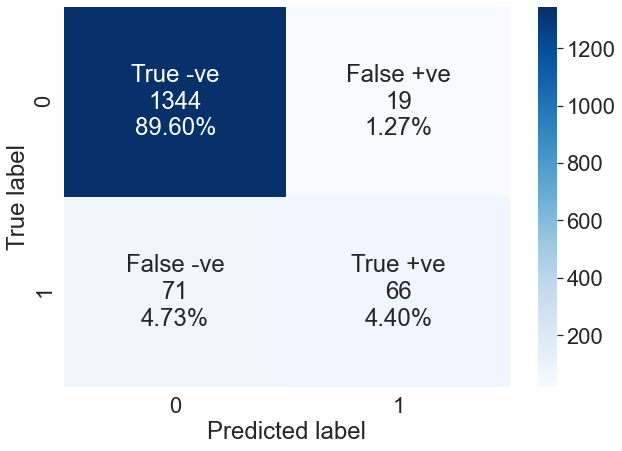

In [44]:
make_confusion_matrix(y_test,pred_test) #display confusion matrix for test set

**Observations:**

* The Logistic Regression model has good accuracy by poor Recall values.
* This could be due to multi-collinearity and insignificant values in the model.
* To check this we will build a model using statsmodels library

### Logistic Regression Using Stats Model:
* Using Stats Model in Python, we will get an list of statistical results for each estimator.
* Stats Model is also used to further conduct tests and statistical data exploration

In [45]:
# adding constant to training and test set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [46]:
#Defining a funciton to call all the performance metrics scores
def metrics_score(model,train,test,train_y,test_y):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable '''
     
    pred = model.predict(train)
    pred_train = list(map(round,pred))
    pred1 = model.predict(test)
    pred_test = list(map(round,pred1))
   
    print("Accuracy on training set : ",accuracy_score(train_y,pred_train))
    print("Accuracy on test set : ",accuracy_score(test_y,pred_test))
    print("Recall on training set : ",recall_score(train_y,pred_train))
    print("Recall on test set : ",recall_score(test_y,pred_test))
    print("Precision on training set : ",precision_score(train_y,pred_train))
    print("Precision on test set : ",precision_score(test_y,pred_test))
    print("F1 on training set : ",f1_score(train_y,pred_train))
    print("F1 on test set : ",f1_score(test_y,pred_test))
        
  

In [47]:
logit = sm.Logit(y_train, X_train) #logistic regression
lg = logit.fit(warn_convergence =False) 
#Checking model performance 
metrics_score(lg,X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.103401
         Iterations 11
Accuracy on training set :  0.9642857142857143
Accuracy on test set :  0.9653333333333334
Recall on training set :  0.7230320699708455
Recall on test set :  0.6788321167883211
Precision on training set :  0.8920863309352518
Precision on test set :  0.9207920792079208
F1 on training set :  0.7987117552334944
F1 on test set :  0.7815126050420168


**Observations**:
* The Accuracy for the test set is 0.96 which looks good
* But the Recall for the test set is only 0.68
* We must further analyse this model and check if the perfomance can be improved.

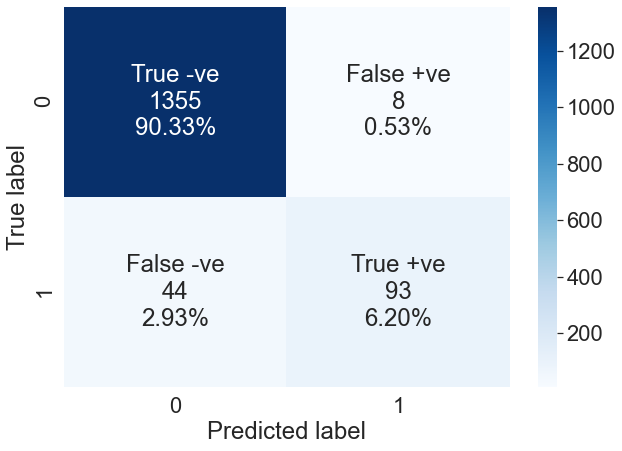

In [48]:
cm_pred = lg.predict(X_test)
pred_test = list(map(round,cm_pred))
make_confusion_matrix(y_test,pred_test)

* The True positive values('ie predicting customers who will purchase loan) is only 6.27% .
* The False negative is at 2.87%. We have to check if we can bring this lower

## Checking for Multicollinearity using VIF Scores:
* Multicollinearity occurs when there is correlation between the predictor variables.
* Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors.
* If VIF is 1 then there is no correlation among the predictor variables. Whereas if VIF exceeds 5, we say there is moderate multi-collinearity and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. 
* Alternatively we can check the significance of a variable to the model with the P-value

In [49]:
#checking the VIF scores for X_train set
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                   455.065715
Age                      92.147984
Experience               92.045702
Income                    1.858182
CCAvg                     1.713029
Mortgage                  1.025051
ZIPCode_91                1.621754
ZIPCode_92                1.985945
ZIPCode_93                1.464313
ZIPCode_94                2.253553
ZIPCode_95                1.854601
ZIPCode_96                1.054818
Family_2                  1.392585
Family_3                  1.384098
Family_4                  1.415154
Education_2               1.302828
Education_3               1.331228
Securities_Account_1      1.128727
CD_Account_1              1.331069
Online_1                  1.042698
CreditCard_1              1.113295
dtype: float64



**Observations:**
* Age and Experience have the highest VIF values.
* We already suspected that these variables might have multicollinearity which is proven true with the above values.
* We will remove Experience column to remove multi-collinearity

In [50]:
X_train1 = X_train.drop('Experience', axis=1)
X_test1 = X_test.drop('Experience', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                   34.008828
Age                      1.013021
Income                   1.854662
CCAvg                    1.710413
Mortgage                 1.025003
ZIPCode_91               1.621751
ZIPCode_92               1.985184
ZIPCode_93               1.464295
ZIPCode_94               2.253317
ZIPCode_95               1.854410
ZIPCode_96               1.054121
Family_2                 1.392497
Family_3                 1.377124
Family_4                 1.413391
Education_2              1.291861
Education_3              1.259592
Securities_Account_1     1.128413
CD_Account_1             1.329926
Online_1                 1.042694
CreditCard_1             1.113241
dtype: float64



* The VIF scores for all the variables is less than 5 and there is no more multi-collinearity in the model.
* Let's check the model performance

In [51]:
logit1=sm.Logit(y_train,X_train1)
lg1=logit1.fit()
metrics_score(lg1,X_train1,X_test1,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.103440
         Iterations 11
Accuracy on training set :  0.9648571428571429
Accuracy on test set :  0.9673333333333334
Recall on training set :  0.7288629737609329
Recall on test set :  0.6934306569343066
Precision on training set :  0.8928571428571429
Precision on test set :  0.9313725490196079
F1 on training set :  0.8025682182985553
F1 on test set :  0.7949790794979081


**Observations**:
* The Accuracy and Recall values for test set has a slight increase


**Variable Significance:**
- The P-Value of the variable indicates if the predictor variable is significant or not.
- The level of significance is 0.05 and any p-value less than 0.05 , then that variable would be considered significant.

In [52]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3480
Method:                           MLE   Df Model:                           19
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.6774
Time:                        15:31:16   Log-Likelihood:                -362.04
converged:                       True   LL-Null:                       -1122.3
Covariance Type:            nonrobust   LLR p-value:                1.684e-311
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.0936      0.873    -16.149      0.000     -15.804     -12.383
Age                      0.0091      0.009      1.026      0.305      -0.008       0.026
Income      


**Insights**
- In the above model the following variables have p-value >0.05:
    - Age, Mortgage, Family2, SecuritiesAccount_1 and all the Dummy variables of the Variable ZIPCode.
- We know that Mortgage has a positive correlation to Personal Loan and Family2 despite having high p-value cannot be removed as its part of the Family category variable.
- Let's remove all the dummy variables of Category Region and check model performance

In [53]:
#dropping all dummy variables of Region
X_train2 = X_train1.drop(['ZIPCode_91','ZIPCode_92','ZIPCode_93','ZIPCode_94','ZIPCode_95','ZIPCode_96'], axis=1)
X_test2 = X_test1.drop(['ZIPCode_91','ZIPCode_92','ZIPCode_93','ZIPCode_94','ZIPCode_95','ZIPCode_96'], axis=1)

In [54]:
logit2=sm.Logit(y_train,X_train2)
lg2=logit2.fit()
#print(lg2.summary())

#Lets look at model performance 
metrics_score(lg2,X_train2,X_test2,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.104151
         Iterations 10
Accuracy on training set :  0.9634285714285714
Accuracy on test set :  0.9666666666666667
Recall on training set :  0.7259475218658892
Recall on test set :  0.6861313868613139
Precision on training set :  0.8798586572438163
Precision on test set :  0.9306930693069307
F1 on training set :  0.7955271565495207
F1 on test set :  0.7899159663865546


* The Recall for test set has dropped to 0.686
* Next let's drop Age variable and check model performance 

In [55]:
#Let's drop Age 
X_train3 = X_train2.drop(['Age'],axis=1)
X_test3 = X_test2.drop(['Age'],axis=1)
logit3=sm.Logit(y_train,X_train3)
lg3=logit3.fit()

metrics_score(lg3,X_train3,X_test3,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.104340
         Iterations 10
Accuracy on training set :  0.9631428571428572
Accuracy on test set :  0.966
Recall on training set :  0.7201166180758017
Recall on test set :  0.6861313868613139
Precision on training set :  0.8821428571428571
Precision on test set :  0.9215686274509803
F1 on training set :  0.7929373996789727
F1 on test set :  0.7866108786610878


* The Recall for test set did not change.
* Next let's drop Mortgage variable for this model and check performance again.
* Even though Mortgage has a positive coefficient, it is compartitively low to the rest of the variables.

In [56]:
#Let's drop Mortgage 
X_train4 = X_train3.drop(['Mortgage'],axis=1)
X_test4 = X_test3.drop(['Mortgage'],axis=1)
logit4=sm.Logit(y_train,X_train4)
lg4=logit4.fit()
metrics_score(lg4,X_train4,X_test4,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.104704
         Iterations 10
Accuracy on training set :  0.9637142857142857
Accuracy on test set :  0.9666666666666667
Recall on training set :  0.717201166180758
Recall on test set :  0.6934306569343066
Precision on training set :  0.8913043478260869
Precision on test set :  0.9223300970873787
F1 on training set :  0.7948303715670436
F1 on test set :  0.7916666666666667


* The Recall for test set improved to 0.6934
* Let's check the model summary

In [57]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.6735
Time:                        15:31:17   Log-Likelihood:                -366.46
converged:                       True   LL-Null:                       -1122.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.6386      0.735    -18.561      0.000     -15.079     -12.198
Income                   0.0651      0.004     16.400      0.000       0.057       0.073
CCAvg       

* There are no more insignificant variables 

**Hence, we will use lg4 as the final model**

## Observations from Model:

### Coefficient Interpretations:

* Income, CCAvg, Mortgage, Family_3, Family_4, Both Education variables and CD_account1 have positive co-efficients; which indicate that an increase in their values will increase the probability of customers having Personal loans


* Family2, Securities_Account_1,Online_1 and CreditCard_1 have a negative co-efficient; Which indicates that an increase in their value would decrease the probability  Customer's having Personal loans


### Converting Coefficients to odds: 
* In a Logistic Regression model, the coefficients of the variable is the Log of odds. 
* We will calculate the  odds ration to quantify the strength of the assosiation between the dependent and independent variables

**Odds ratio =  Exp(coef)**

**Probability  = odds/(1+odds)**

In [58]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg4.params, columns=['coef']) #getting the coefficent from lg4 model
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef) #calculate the odds ratio

lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio']) #calculate the probability 
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [59]:
# Filter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.12,61.26,0.98,0.00
Education_2,4.09,59.54,0.98,0.00
CD_Account_1,3.80,44.49,0.98,0.00
Family_3,2.33,10.24,0.91,0.00
Family_4,1.54,4.67,0.82,0.00
CCAvg,0.41,1.51,0.60,0.00
Income,0.07,1.07,0.52,0.00
Online_1,-0.65,0.52,0.34,0.00
CreditCard_1,-1.12,0.33,0.25,0.00
const,-13.64,0.00,0.00,0.00


**Observations**:
* Customers with higher Education level, ie, Graduate and Post-Graduate level and with a CD Account have a 98% probability of having personal loans
* Customers with larger family size of 3 and 4 have higher probabilities 91% and 82% respectively of having a personal loan.
* Other Significant Variables that have moderate to high probability are Income , Customers who use the Bank's online services and those who have addditional credit cards from Other Banks.


### Identifying Key Variables:
* The model indicates the following key variables to have a strong relationship with the dependent variable Personal_Loan
    - Education 
    - CD_Account 
    - Family
    - CCAvg
    - Income
    - Online and
    - CreditCard

**Confusion matrix Prediction on lg4 model Test Data**

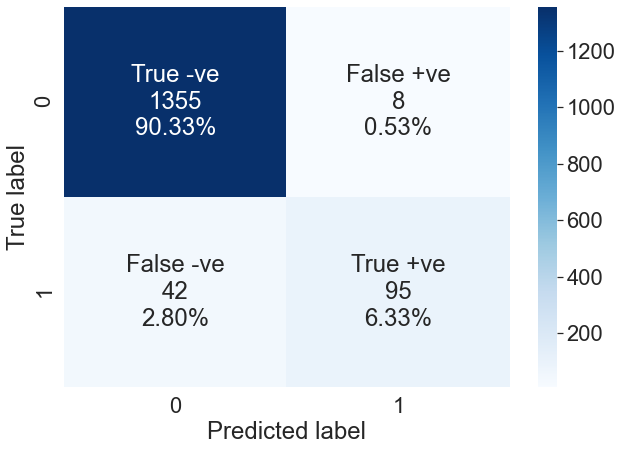

In [60]:
pred1 = lg4.predict(X_test4)
pred_test1 = list(map(round,pred1))
make_confusion_matrix(y_test,pred_test1)

**Observations**:
- In the lg4 model:
    - True positive is 6.33% 
    - True Negative is 90.33%
    - False Positive is 0.53% 
    - False Negative is 2.8%
- We need to improve the True Positive and reduce False Negative values.
- Let's check for model improvement

## Model Performance Improvement

###  AUC-ROC curve:
* This is a performance measurement for classification problems at various threshold settings

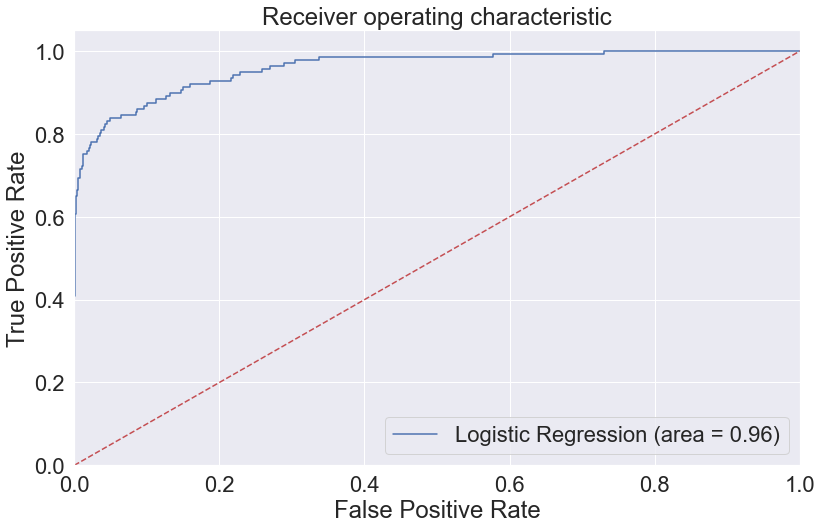

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Optimal Threshold from AUC-ROC**

* The optimal threshold cut off will be where True Positive Rate is high and False Positive Rate is low

In [62]:
# Optimal threshold as per AUC-ROC curve

optimal_idx = np.argmax(tpr - fpr)
optimal = thresholds[optimal_idx]
print(optimal)

0.2016926863819639


In [63]:
#Applying the optimal threshold to predict model for test data
y_pred_train = (lg4.predict(X_train4)>optimal).astype(int)
y_pred_test = (lg4.predict(X_test4)>optimal).astype(int)

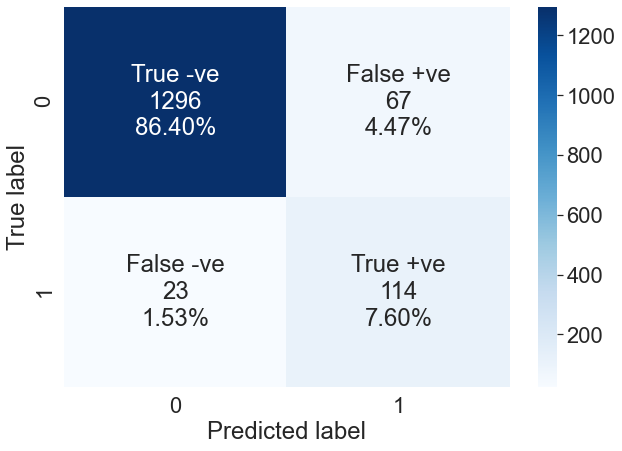

In [64]:
#Confusion matrix for test set for lg4 model
make_confusion_matrix(y_test,y_pred_test)

In [65]:
print("Accuracy on training set : ",accuracy_score(y_train,y_pred_train))
print("Accuracy on test set : ",accuracy_score(y_test,y_pred_test))
print("\nRecall on training set : ",recall_score(y_train,y_pred_train))
print("Recall on test set : ",recall_score(y_test,y_pred_test))
print("\nPrecision on training set : ",precision_score(y_train,y_pred_train))
print("Precision on test set : ",precision_score(y_test, y_pred_test))

print("\nF1 Score on training set : ",f1_score(y_train,y_pred_train))
print("F1 Score on test set : ",f1_score(y_test, y_pred_test))

Accuracy on training set :  0.9497142857142857
Accuracy on test set :  0.94

Recall on training set :  0.8483965014577259
Recall on test set :  0.8321167883211679

Precision on training set :  0.7012048192771084
Precision on test set :  0.6298342541436464

F1 Score on training set :  0.7678100263852243
F1 Score on test set :  0.7169811320754716


**Observations**

* At Optimal Threshold, the Accuracy of the test set has reduced to 0.94 
* But the Recall score for Test set has rised significantly to 0.8321


### Percision-Recall Curve

* This curve will plot the precision and Recall values for the lg4 model.

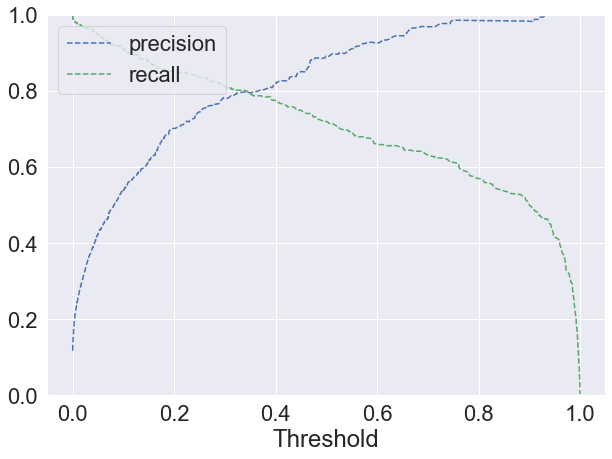

In [66]:
from sklearn.metrics import precision_recall_curve
y_PresRec=lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_PresRec)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [67]:
#Applying the optimal threshold to predict model for test data
optimal_threshold = 0.25 # we get a balanced recall and precision at this threshold

y_pred_train1 = (lg4.predict(X_train4)>optimal_threshold).astype(int)
y_pred_test1 = (lg4.predict(X_test4)>optimal_threshold).astype(int)

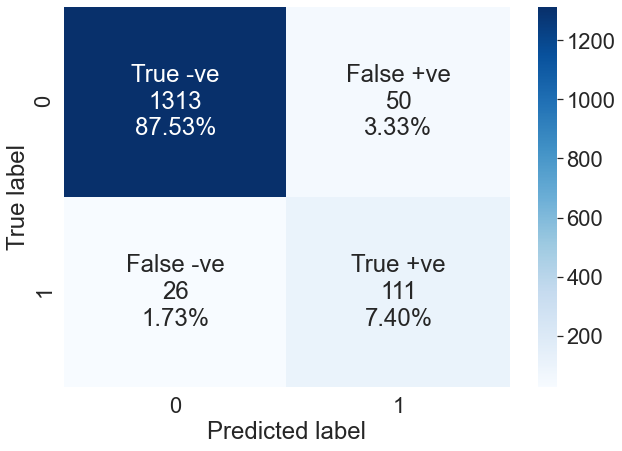

In [68]:
#Confusion matrix for test set for lg4 model
make_confusion_matrix(y_test,y_pred_test1)

In [69]:
print("Accuracy on training set : ",accuracy_score(y_train,y_pred_train1))
print("Accuracy on test set : ",accuracy_score(y_test,y_pred_test1))
print("\nRecall on training set : ",recall_score(y_train,y_pred_train1))
print("Recall on test set : ",recall_score(y_test,y_pred_test1))
print("\nPrecision on training set : ",precision_score(y_train,y_pred_train1))
print("Precision on test set : ",precision_score(y_test, y_pred_test1))

print("\nF1 Score on training set : ",f1_score(y_train,y_pred_train1))
print("F1 Score on test set : ",f1_score(y_test, y_pred_test1))

Accuracy on training set :  0.956
Accuracy on test set :  0.9493333333333334

Recall on training set :  0.8367346938775511
Recall on test set :  0.8102189781021898

Precision on training set :  0.7454545454545455
Precision on test set :  0.6894409937888198

F1 Score on training set :  0.7884615384615385
F1 Score on test set :  0.7449664429530201



**Observations**
* At 0.25 threshold, Recall has dropped to 0.810 for test set 
* But the Precision value has increased and Accuracy remains same.
* Since Precision is not the defining metric; AUC-ROC threshold value has a better model 

# Sequential Feature Selector method:
* This method will begin with an empty model and will add in each forward step the one variable that gives the maximum improvement to the model.
* The aim of this method is to discrad deceptive features and also speed training and testing process

In [70]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt 

In [71]:
## Defining X and Y variables
X = df.drop(['Personal_Loan'], axis=1)
Y = df[['Personal_Loan']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)
# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.6s finished

[2021-07-02 15:31:26] Features: 1/19 -- score: 0.35393939393939394[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.4s finished

[2021-07-02 15:31:34] Features: 2/19 -- score: 0.46060606060606063[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.1s finished

[2021-07-02 15:31:41] Features: 3/19 -- score: 0.5948717948717949[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

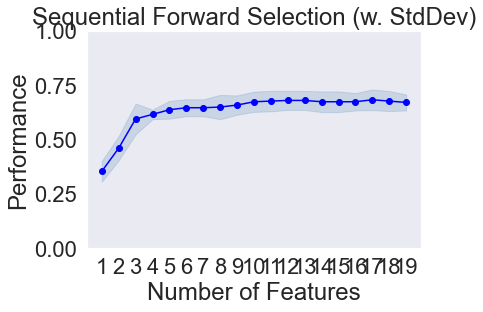

In [72]:
# we will first build model with all 
sfs = SFS(m, k_features=19, forward=True, floating=False, scoring='recall', verbose=2, cv=5)
sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(),kind='std_dev')
plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

* Since the recall value only stopped rising after 10th feature, we will proceed only with the best 10 features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.5s finished

[2021-07-02 15:32:48] Features: 1/10 -- score: 0.35393939393939394[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.2s finished

[2021-07-02 15:32:53] Features: 2/10 -- score: 0.46060606060606063[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.4s finished

[2021-07-02 15:32:59] Features: 3/10 -- score: 0.5948717948717949[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

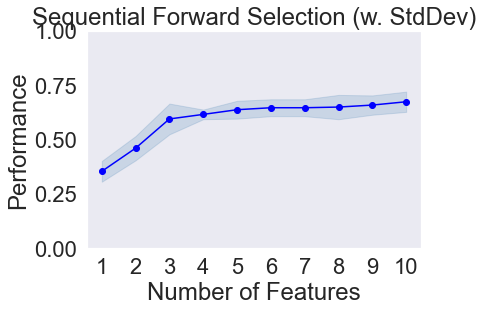

In [73]:
sfs1 = SFS(m,k_features=10, forward=True, floating=False, scoring='recall', verbose=2, cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')
plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [74]:
#Which are the important features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 3, 10, 11, 12, 13, 14, 15, 17, 18]


In [75]:
#Looking at the column names
X_train.columns[feat_cols]

Index(['Income', 'CCAvg', 'ZIPCode_96', 'Family_2', 'Family_3', 'Family_4',
       'Education_2', 'Education_3', 'CD_Account_1', 'Online_1'],
      dtype='object')

In [76]:
#Creating new X_train and X_test with the selected columns
X_train_final = X_train[X_train.columns[feat_cols]]
X_test_final = X_test[X_train_final.columns]

In [77]:
#Fitting logistic regression model
logreg1 = LogisticRegression(solver='saga',max_iter=1000,penalty='none',verbose=True,n_jobs=1,random_state=29)
logreg1.fit(X_train_final, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 7 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished


LogisticRegression(max_iter=1000, n_jobs=1, penalty='none', random_state=29,
                   solver='saga', verbose=True)

In [78]:
#Lets check the model performance
metrics_score(logreg1,X_train_final,X_test_final,y_train,y_test)

Accuracy on training set :  0.9417142857142857
Accuracy on test set :  0.942
Recall on training set :  0.4603658536585366
Recall on test set :  0.5131578947368421
Precision on training set :  0.848314606741573
Precision on test set :  0.8571428571428571
F1 on training set :  0.5968379446640316
F1 on test set :  0.6419753086419753


confusion matrix = 



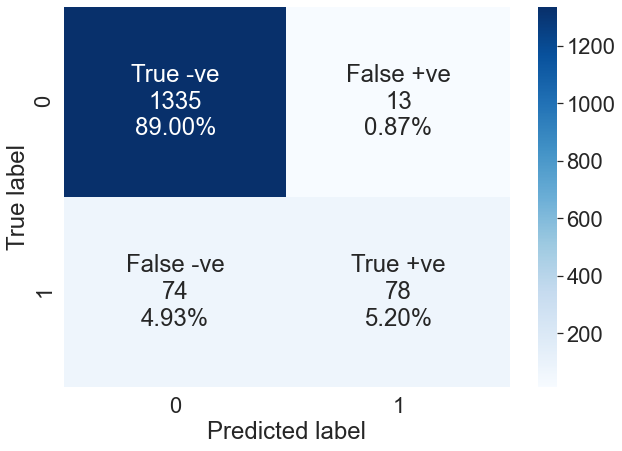

In [79]:
pred_test2 = logreg1.predict(X_test_final)

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test2)

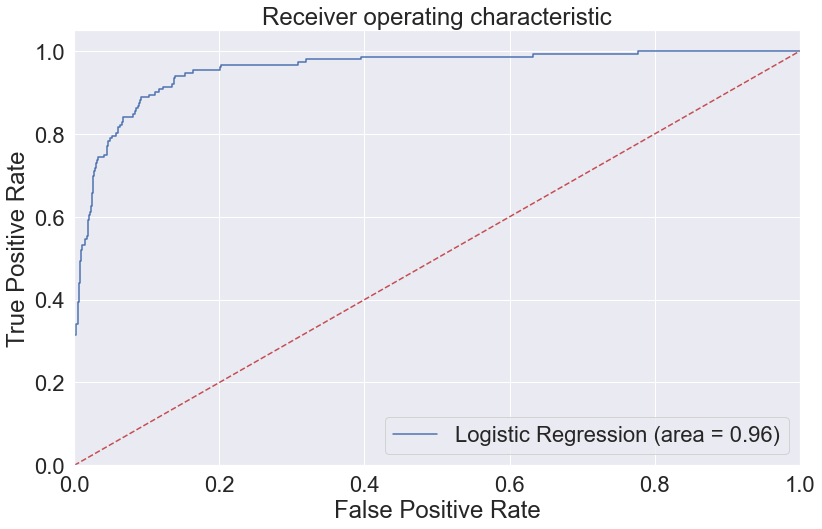

In [80]:
#AOC-RUC Curve

SFS_roc_auc = roc_auc_score(y_test, logreg1.predict_proba(X_test_final)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg1.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % SFS_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
optimal_idx1 = np.argmax(tpr - fpr)
optimal_threshold1 = thresholds[optimal_idx1]
print(optimal_threshold1)

0.13644530569386723


In [82]:
y_pred_trn = (logreg1.predict(X_train_final)>optimal_threshold)
y_pred_tst = (logreg1.predict(X_test_final)>optimal_threshold)

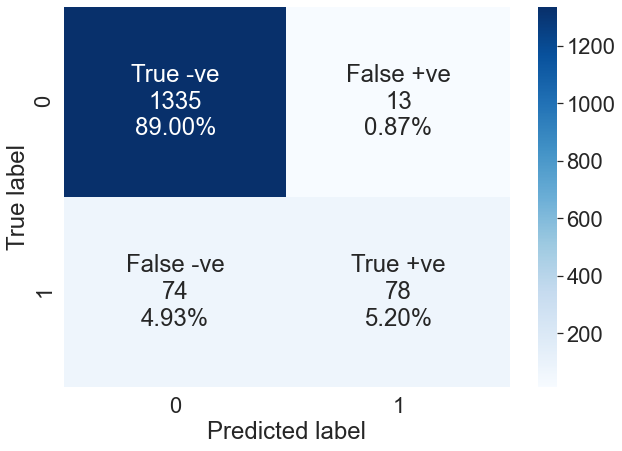

In [83]:
# let us make confusion matrix after optimal threshold has been choosen
make_confusion_matrix(y_test,y_pred_tst)

In [84]:
print('Accuracy on train data:',accuracy_score(y_train, y_pred_trn) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_tst))

print('\nRcall on train data:',recall_score(y_train, y_pred_trn) )
print('Recall on test data:',recall_score(y_test, y_pred_tst))


Accuracy on train data: 0.9417142857142857
Accuracy on test data: 0.942

Rcall on train data: 0.4603658536585366
Recall on test data: 0.5131578947368421


**Observations**:
* The Accuracy is at 0.94 for the test set but the Recall is only 0.513 
* The recall value is only slightly better than the Sklearn logistic regression model

## Model Building - Decision Tree:
### Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.6 KB


### Split Data

In [86]:
X= df1.drop(['Personal_Loan'],axis=1)
y=df1['Personal_Loan']

In [87]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
# Splitting data into training and test set:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=29)
print(X_train.shape,X_test.shape)

(3500, 20) (1500, 20)


## Model Building
* We will build the Decision Tree model using the default 'gini' criteria to split.
* In our dataset, we know that there is an imbalance in the Dependent variable Personal_Loan. ie. 90.4% of frequency is for 0 and 9.6% is for 1.
* This might cause the Decision Tree model to become biased towards the dominant class
* Hence we will add a class_weight hyperparameter as a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1

In [88]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=29)

In [89]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=29)

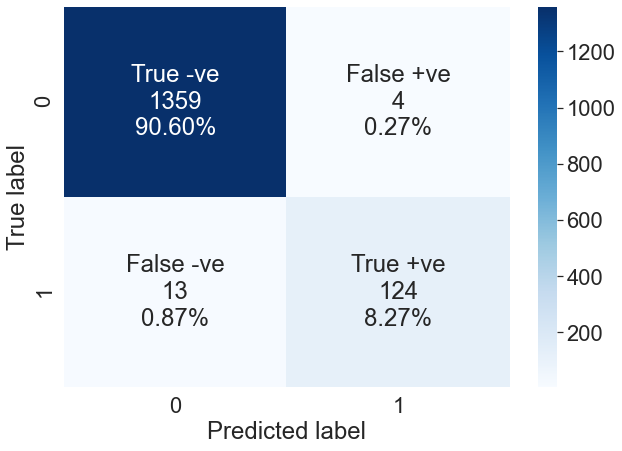

In [90]:
y_predict = Dt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [91]:
y_train.value_counts(1)

0   0.90
1   0.10
Name: Personal_Loan, dtype: float64

**Observations**:
* True Positive - 8.20%
* False Positive - 0.27%
* False Negative - 0.93%
* True Negative - 90.6%

* We also see that there are only 9.8% of the Class '1'.

## Model Evaluation Criteria - Recall
* As discussed earlier, the Bank wants to predict and identify all potential customers who will buy a Personal loan.
* We want to maintain the False Negative ie. wrongly identifying customers as non-buyers but they actually purchase a loan as low as possible.

* Hence Recall is the metric to be used


In [92]:
def scores(model):
    """ model : classifier to predict X values """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
    print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

    print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
    print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
    print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
    print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))

In [93]:
#Let's calculate the Accuracy and Recall Score of the model
scores(Dt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9886666666666667

Recall on training set :  1.0
Recall on test set :  0.9051094890510949

Precision on training set :  1.0
Precision on test set :  0.96875

F1 on training set :  1.0
F1 on test set :  0.9358490566037736


* The Accuracy values for both Train and Test set are very close.
* But there is huge difference in the Recall Scores for train and test set. 
* This suggests that the model is overfitting.

## Visualizing the Decision Tree

In [94]:
column_names = list(X.columns)
print(column_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


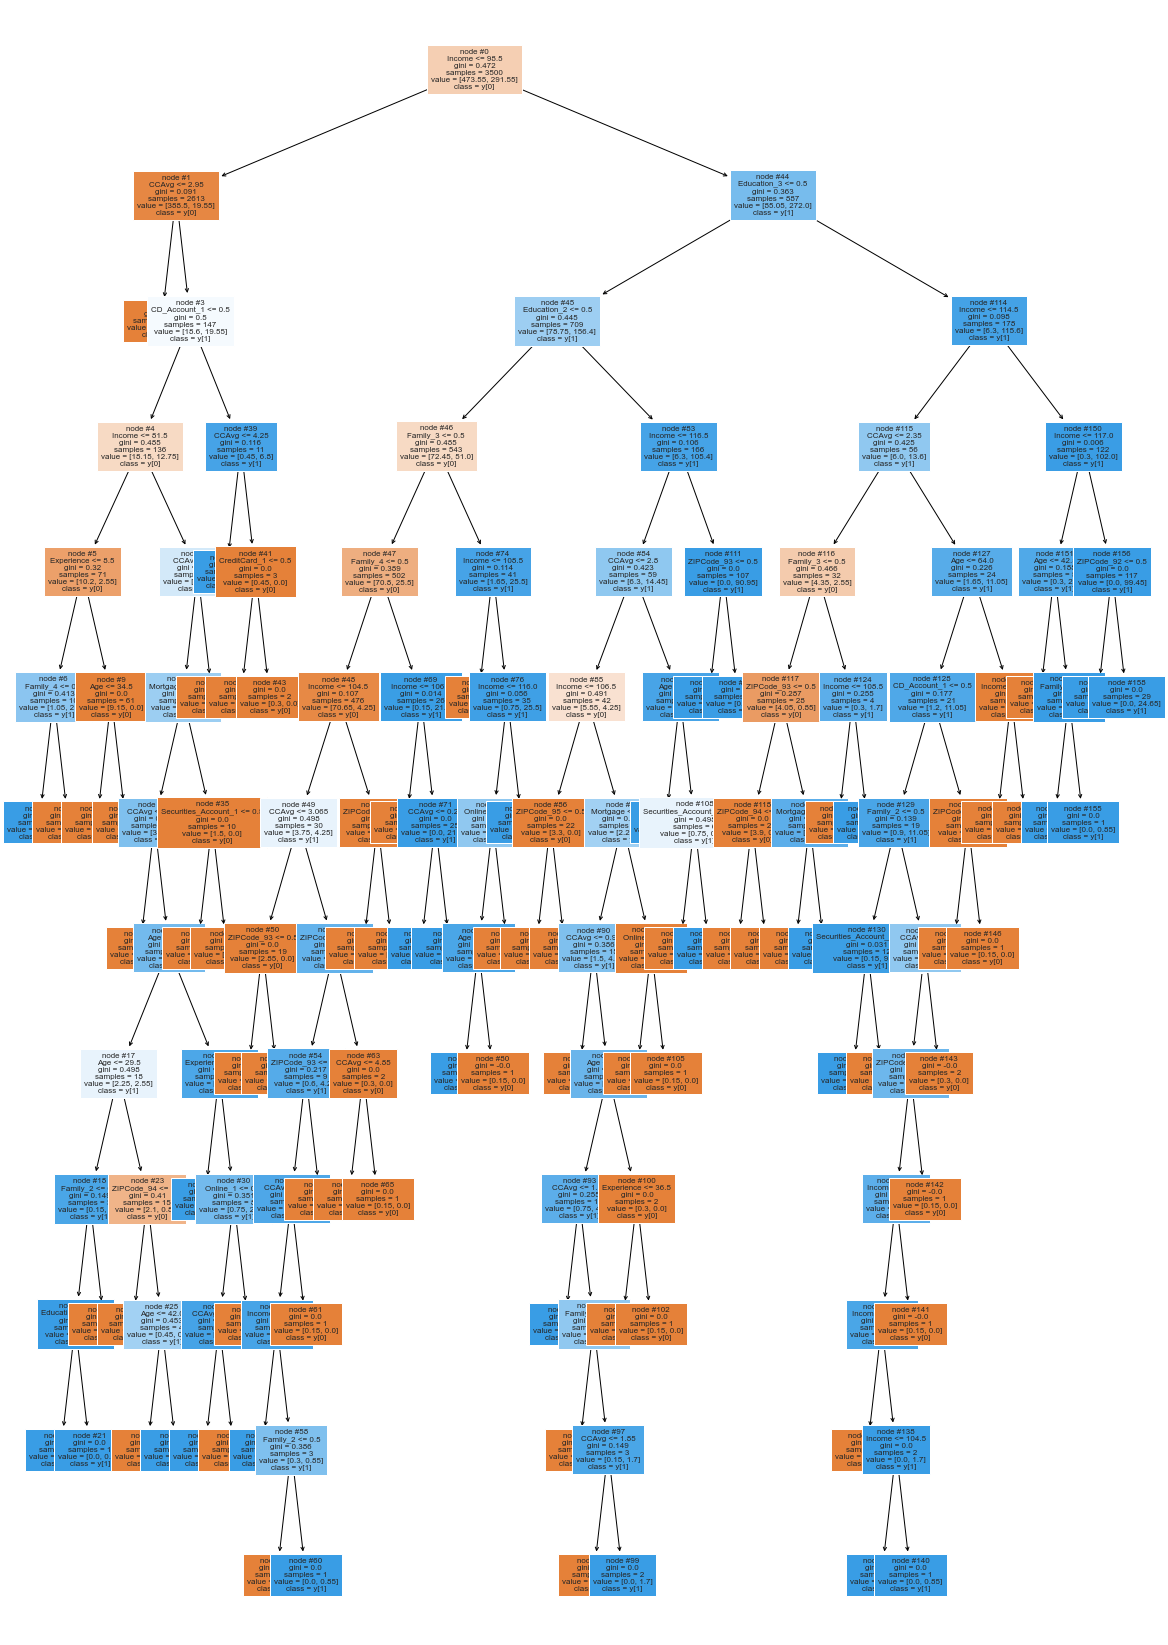

In [95]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(Dt,feature_names=column_names,filled=True,fontsize=8,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [96]:
# Text report showing the rules of a decision tree -

print(tree.export_text(Dt,feature_names=column_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.90, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |--- Age <= 34.50
|   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |   |--- Age >  34.50
|   |   |   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- Mortgage <= 148.00
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   

**Observations**:
* There are close to a 100 nodes in the tree with the smallest sample size = 2 and the Gini value for the last node is 0.0
* This is surely a overfitted Decision Tree model 
* Let's check the important features in the tree. This is also called the Gini importance

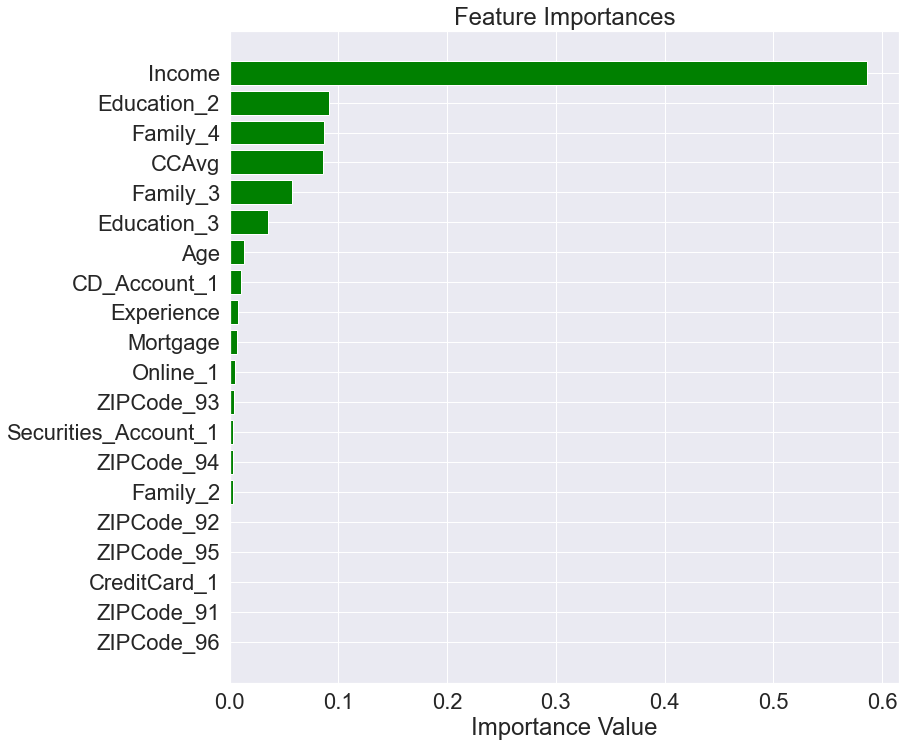

In [97]:
importance = Dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='green', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Importance Value')
plt.show()

**Observations**:
* The top five important features are:
    - Income
    - Education_2
    - Family_4
    - CCAvg
    - Family_3
    
* The above tree is complex to interpret
* Since there is suspicions of over-fitting we must prune the tree(reduce overfit) for better model performance. 


## Reduce Over-Fitting:


### GridSearch for Hyperparameter tuning of Tree Model
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparamters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


In [98]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
classifier = DecisionTreeClassifier(random_state=29,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(1,11), 
            'criterion': ['gini'],
            'splitter': ['best','random'],
            'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(classifier, parameters, scoring=recall_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       max_features='log2', random_state=29)

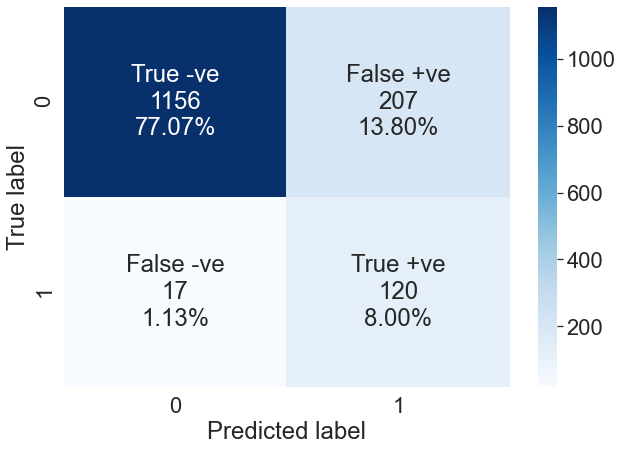

In [99]:
pred_test2 = classifier.predict(X_test)
make_confusion_matrix(y_test,pred_test2)

In [100]:
scores(classifier)

Accuracy on training set :  0.8588571428571429
Accuracy on test set :  0.8506666666666667

Recall on training set :  0.967930029154519
Recall on test set :  0.8759124087591241

Precision on training set :  0.40736196319018403
Precision on test set :  0.3669724770642202

F1 on training set :  0.5734024179620034
F1 on test set :  0.5172413793103449


**Observations**:
* The Recall for test set has improved to 0.876 after the hyperparameter tuning.

### Visualizing the Tree

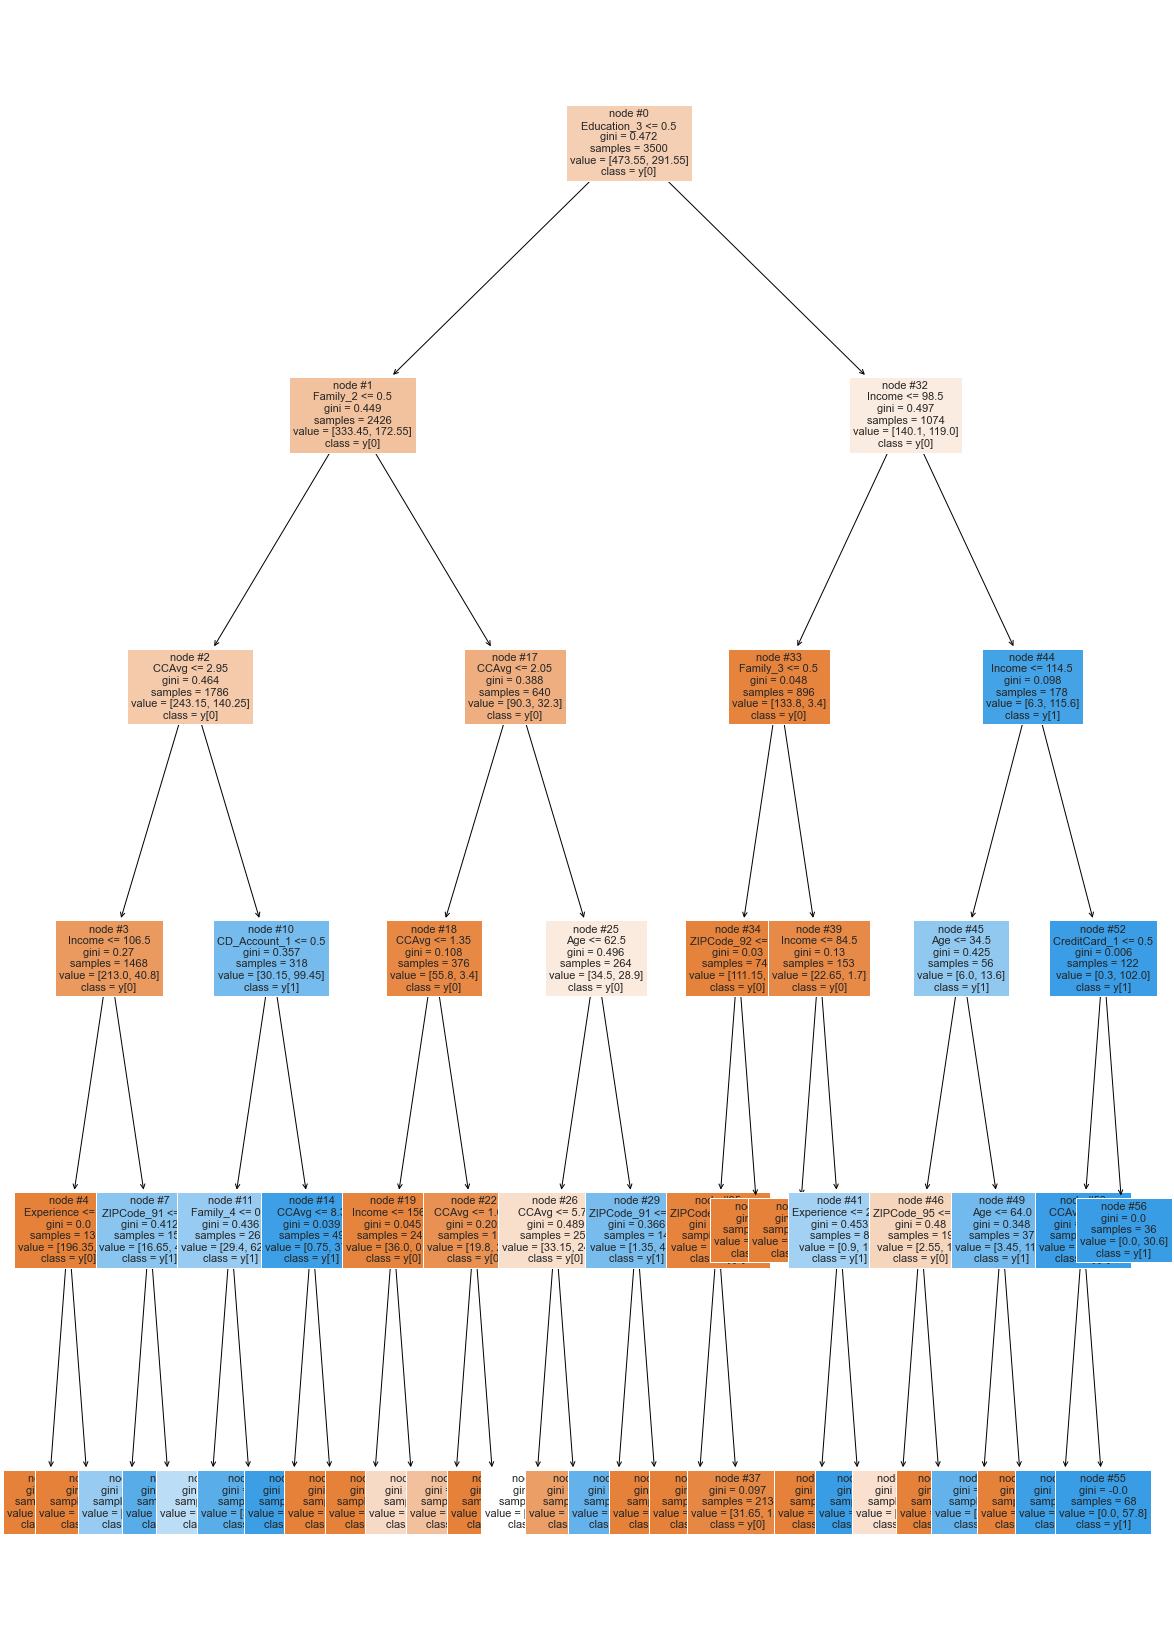

In [101]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(classifier,feature_names=column_names,filled=True,fontsize=11,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [102]:
# Text report showing the rules of a decision tree -

print(tree.export_text(classifier,feature_names=column_names,show_weights=True))

|--- Education_3 <= 0.50
|   |--- Family_2 <= 0.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- Income <= 106.50
|   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |--- weights: [2.70, 0.00] class: 0
|   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |--- weights: [193.65, 0.00] class: 0
|   |   |   |--- Income >  106.50
|   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |--- weights: [15.30, 32.30] class: 1
|   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |--- weights: [1.35, 8.50] class: 1
|   |   |--- CCAvg >  2.95
|   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [25.65, 39.10] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [3.75, 22.95] class: 1
|   |   |   |--- CD_Account_1 >  0.50
|   |   |   |   |--- CCAvg <= 8.30
|   |   |   |   |   |--- weights: [0.60, 37.40] class: 1
|   |   |   |   |--- CCAvg >  8.30
|   |   |   |   |   |--- weights: [0.15, 0.00

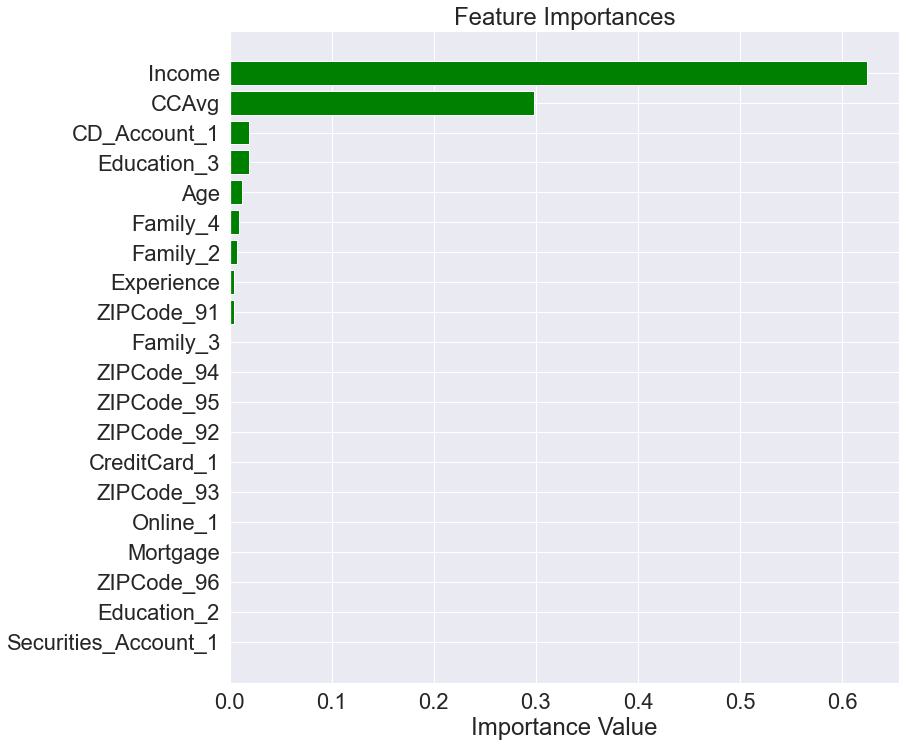

In [103]:
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Importance Value')
plt.show()

**Observations**:
* The order importance of features has changed.
* The value for Income has increased and CCAvg is now the second most important feature.

## Cost Complexity Pruning
* This is another method to reduce and control the size of the Tree. This method is called Post-Pruning 
* Here, we use the Cost complexity Parameter `ccp_alpha` to prune the tree
* We will remove each possible nodes based on the alpha value. The greater the `ccp_alpha`value, higher number of nodes will be pruned and the total impurity will also increase

**Finding the `ccp_alpha` values**

In [104]:
ccp = DecisionTreeClassifier(random_state=29,class_weight = {0:0.15,1:0.85})
ccp.fit(X_train,y_train)
path = ccp.cost_complexity_pruning_path(X_train, y_train) #finding the alpha and impurity values
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [105]:
pd.DataFrame(path)
 #display as a dataframe

,ccp_alphas,impurities
0,0.00,-0.00
1,0.00,-0.00
2,0.00,-0.00
3,0.00,-0.00
4,0.00,-0.00
5,0.00,-0.00
6,0.00,-0.00
7,0.00,-0.00
8,0.00,-0.00
9,0.00,-0.00


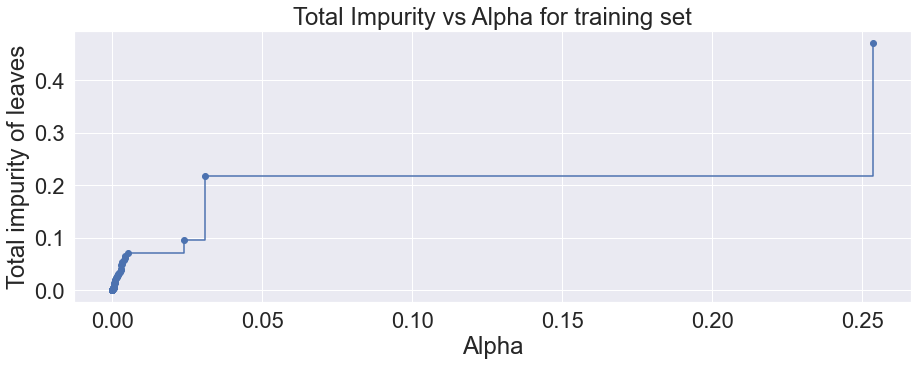

In [106]:
#plotting alpha vs impurities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("Alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Alpha for training set")
plt.show()

* The impurity values increases till ~ 0.03 of alpha value and remains constant till alpha ~ 0.22 before rising sharply

In [107]:
# Finding the number of nodes in the last tree and the corresponding alpha value
clfs = [] #creating a empty list 
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=29, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train) #apply classifier model with alpha values  
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1])) #finding the last node and its corresponding alpha

Number of nodes in the last tree is: 1 with ccp_alpha: 0.253685292462332


**Let's plot the Recall Vs Alpha values for both Train and Test set**

In [108]:
#Creating empty lists for train and test recall
recall_train=[]
recall_test=[]

In [109]:
#run a loop to appead all recall scores for train and test at the alpha values
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=29, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    y_pred_train1 = clf.predict(X_train)
    y_pred_test1 = clf.predict(X_test)
    values_train = metrics.recall_score(y_train,y_pred_train1)
    values_test= metrics.recall_score(y_test,y_pred_test1)
    recall_train.append(values_train)
    recall_test.append(values_test)

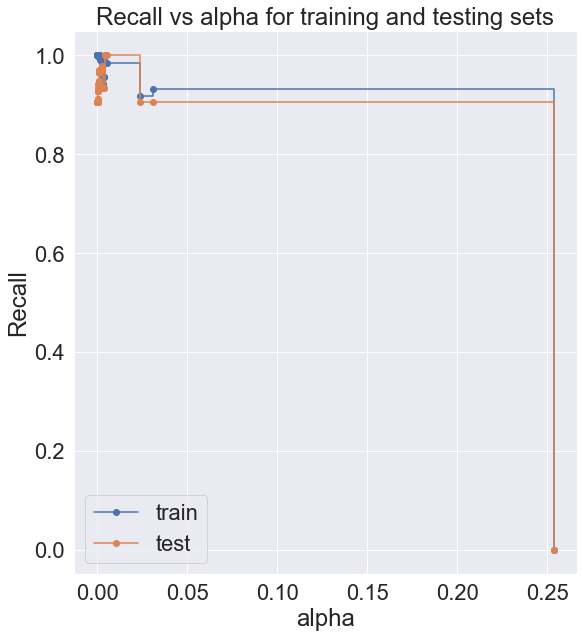

In [110]:
#plot the recall VS alpha 
fig, ax = plt.subplots(figsize=(9,10))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend(loc='lower left')
plt.show()

In [111]:
#Let's find the best alpha threshold for max recall
index_best_alpha = np.argmax(recall_test)
best_model = clfs[index_best_alpha]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004235888667958439,
                       class_weight={0: 0.15, 1: 0.85}, random_state=29)


**Maximum Recall value is at alpha 0.0042. But at this alpha we will lose valuable business information and the decision tree might have very less nodes.** 

**Hence we will use the point where the Recall values just begins to drop first; at alpha = 0.003.
This will ensure we are retaining information and also get a high recall value.**

In [112]:
#at alpha = 0.003
best_model2 = DecisionTreeClassifier(ccp_alpha=0.003,
                       class_weight={0: 0.15, 1: 0.85}, random_state=29)
best_model2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.003, class_weight={0: 0.15, 1: 0.85},
                       random_state=29)

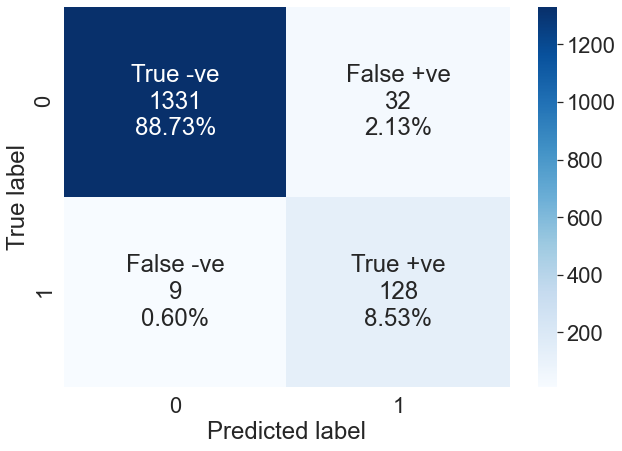

In [113]:
pred_test3=best_model2.predict(X_test)
make_confusion_matrix(y_test,pred_test3)

**Observations**:
* The True positive has increased to 8.53% and the False negative has decreased to 0.6%.

In [114]:
scores(best_model2)

Accuracy on training set :  0.9748571428571429
Accuracy on test set :  0.9726666666666667

Recall on training set :  0.9416909620991254
Recall on test set :  0.9343065693430657

Precision on training set :  0.8260869565217391
Precision on test set :  0.8

F1 on training set :  0.8801089918256132
F1 on test set :  0.861952861952862


**Observations**:

* The overall results for recall has increased from the initial model and its also higher than the Hypertuned model.
* The performance for both train(0.9417 and test (0.9343) recall is close and comparable


### Visualizing Decision Tree for best_model2

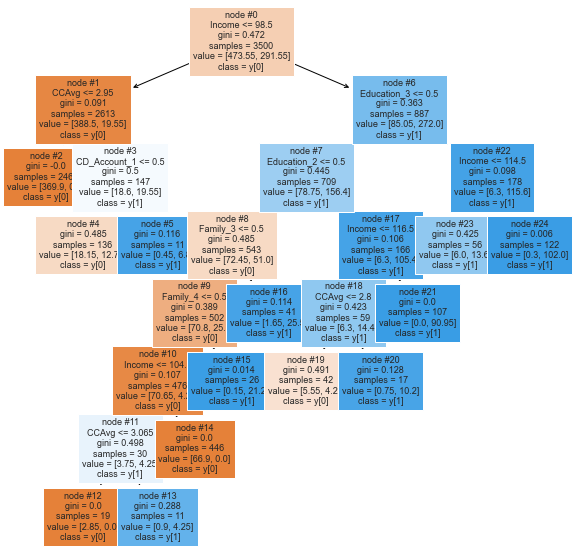

In [115]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model2,feature_names=column_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [116]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2,feature_names=column_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.90, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- weights: [18.15, 12.75] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.45, 6.80] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 104.50
|   |   |   |   |   |   |--- CCAvg <= 3.06
|   |   |   |   |   |   |   |--- weights: [2.85, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.06
|   |   |   |   |   |   |   |--- weights: [0.90, 4.25] class: 1
|   |   |   |   |   |--- Income >  104.50
|   |   |   |   |   |   |--- weights: [66.90, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 21.25] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.65, 25.50] class: 1
|   |   |--- Education_2 

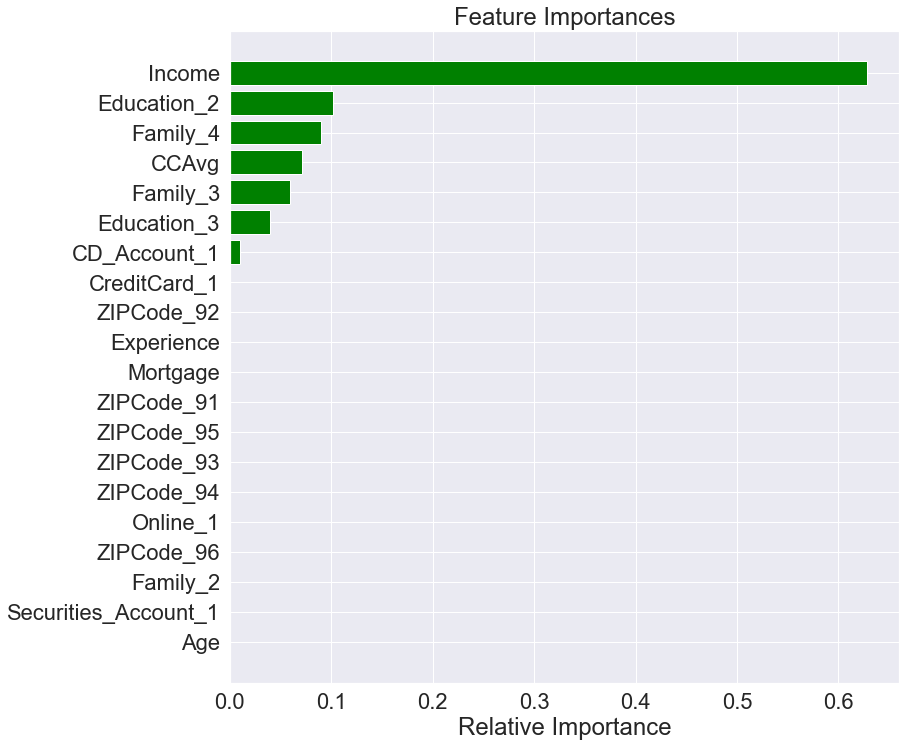

In [117]:
importances2 = best_model2.feature_importances_
indices = np.argsort(importances2)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances2[indices], color='green', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income is the most important feature to predict if the customer bought a personal loan. 
* Education2, Family4 and CCAvg are the next most important predictor features.

## Comparison of all Models for Personal_Loan prediction

In [118]:
All_models = {'Model':['Logistic Regression Model-sklearn','Logistic Regression-Statsmodel-mutlicollinearity remvo','Logistic Regression-Optimal Threshold =0.2017','Logistic Regression-Optimal Threshold =0.25','Sequential Feature Selction Method','Initial Decision Tree','Decision treee- hyperparameter tuning(pre-pruning)',
                                          'Decision tree- Cost Complexity post-pruning'],'Train_Accuracy':[0.9380,0.9640,0.9497,0.9560,0.944,1.0,0.8070,0.9749],'Test_Accuracy':[0.9387,0.9660,0.9400,0.9493,0.944,0.9880,0.80,0.972],'Train_Recall':[0.5245,0.7289,0.8484,0.8367,0.4817,1.0,0.9854,0.9417], 'Test_Recall':[0.4599,0.6788,0.8321,0.8102,0.5131,0.9051,0.9343,0.9343]}
comparison = pd.DataFrame(All_models)

comparison

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall
0,Logistic Regression Model-sklearn,0.94,0.94,0.52,0.46
1,Logistic Regression-Statsmodel-mutlicollineari...,0.96,0.97,0.73,0.68
2,Logistic Regression-Optimal Threshold =0.2017,0.95,0.94,0.85,0.83
3,Logistic Regression-Optimal Threshold =0.25,0.96,0.95,0.84,0.81
4,Sequential Feature Selction Method,0.94,0.94,0.48,0.51
5,Initial Decision Tree,1.00,0.99,1.00,0.91
6,Decision treee- hyperparameter tuning(pre-prun...,0.81,0.80,0.99,0.93
7,Decision tree- Cost Complexity post-pruning,0.97,0.97,0.94,0.93


## Conclusion:
* From the above table we see that the Decision Tree - Cost Complexity(Post-Pruning) model with impurity alpha value = 0.03 ;has the best Accuracy of 97% and Recall of 93.4%. This is the best model for this dataset.
* The most important features from this model are:
    - Income
    - Education_2 (Graduate)
    - Family_4 (family of 4 )
    - CCAvg (Credit Card Average)
    - CD_Account1 (Customers with a CD account)   

* This model is also not affected by outliers or extreme values

## Business Insights 
* Income has been the consistent variable across all the models built. This shows that it the most important variable to consider.

* From the tree report the final model, we see the following segments/variable combinations of customers who have a strong probability of borrowing loans.
    - Higher Income and Higher Credit Card Average
    - Higher Education levels (2 &3) and Higher Income
    - Larger Family size and high income
    - Customers with a CDAccount
* These potential customer segments can be targeted by the marketing team to increase the conversion rate. 

#### Possible recommendations to the campaign and business:
- A customer with higher income has a better rate of paying back the loans, hence customers should be treated with more incentives in the campaign.
- Target customers with high education levels as we see that such customer tend to have high income paying jobs.
- Customers with high credit card average are also potential target. Hence the bank can offer suitable combination offers to the banks credit card along with purchasing a loan. These decision require careful consideration of the bank's lending policies.
- Offering Customers with a larger family and high income flow, incentives beneficial to the whole family rather than just the customer. 
- Almost 50% of customers who have a CD account purchased a loan. Any material from the previous campaign that centered on this area can be improved to increase conversion rate. 
- The bank may offer lower interest rates at larger payment periods with possible financial investment suggestions to improve customer retention.
-  A key idea would be to help educate/provide insights to the customers on better money management, saving and refinancing solutions. By ensuring the customer engagement, the bank can increase its loyalty with its customers.
- The Bank and its marketing campaign must ensure that they are updated on all the current social and economic conditions of the market while promoting. 

## Recommendations

* In this dataset, only 9.6% of total customers purchased a loan after the last campaign. 
* Although we were able to build a 97% accuracy model with a high recall, the imbalance in the data is very high.
* We do not know how the model would predict if the imbalance were to be corrected.
* Suggested recommendations would be to decrease the imbalance in the dataset.
* Another imbalance in feature was on Mortgage. More than 50% of customers in this dataset did not have a house/mortgage. Even though we saw that mortgage had a positive correlation with Income and customers with higher mortgages also purchased loans, there was  heavy skewness in this variable. 
* We do not know if the lack of significance for Mortgage in our bestmodel2 is due to its skewness or due to no values. Since Mortgage is also a type of loan, a better approach would be to separate customers at various mortgage levels and then build a predicting model.
* This approach may also bring the location / ZIPCode variable into consideration as Mortgage levels are related to the location of the house. 
* Certain variables(i.e Online, Securities Account and CreditCard) in the dataset had no significance to the dependent variable. Future data collected can ignore these variables and focus more on correcting the imbalance.

# Misclassification of model:
## Analysing predictions that were off the mark

In [119]:
df2=df.copy() # making a new copy from the dataset without outlier treatment
A = df2.drop(['Personal_Loan'], axis=1) #dropping the dependent variable
B = df2[['Personal_Loan']]

In [120]:
A = pd.get_dummies(A, drop_first=True) #creat dummy variables 
# Splitting data into training and test set:
A_train,A_test, B_train, B_test =train_test_split(A,B, test_size=0.3,random_state=1)
#split data
print(A_train.shape,A_test.shape)

(3500, 20) (1500, 20)


In [121]:
A_test.head()

,Age,Experience,Income,CCAvg,Mortgage,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
2764,31,5,84.00,2.90,105.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4767,35,9,45.00,0.90,101.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3814,34,9,35.00,1.30,0.00,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3499,49,23,114.00,0.30,252.50,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2735,36,12,70.00,2.60,165.00,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [122]:
#apply the final model best_model2 to the train and test set
final_pred_test = best_model2.predict(A_test)

In [123]:
data = df2.loc[A_test.index] #selecting rows with same index as test set
data['Predicted'] = final_pred_test
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted
2764,31,5,84.00,91,1,2.90,3,105.00,0,0,0,0,1,0
4767,35,9,45.00,90,3,0.90,1,101.00,0,1,0,0,0,0
3814,34,9,35.00,94,3,1.30,1,0.00,0,0,0,0,0,0
3499,49,23,114.00,94,1,0.30,1,252.50,0,0,0,1,0,0
2735,36,12,70.00,92,3,2.60,2,165.00,0,0,0,1,0,0


In [124]:
comparison_column = np.where(data["Predicted"] == data["Personal_Loan"], True, False) #identifying the misclassification
data['Misclassification'] = comparison_column
data['Misclassification'].value_counts()

True     1451
False      49
Name: Misclassification, dtype: int64

* There are 49 misclassified data in the test set

In [125]:
incorrect =data[data['Misclassification']== False] # Grouping only the misidentified rows 
incorrect.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted,Misclassification
2784,36,9,115.00,91,4,2.20,2,0.00,1,0,0,0,0,0,False
2625,61,36,108.00,93,4,3.40,2,0.00,0,0,0,1,0,1,False
719,61,35,110.00,92,3,4.40,1,0.00,0,1,0,1,0,1,False
2523,49,23,100.00,95,2,5.20,1,0.00,0,0,0,0,0,1,False
2158,50,25,83.00,94,4,3.10,1,0.00,1,0,0,0,1,0,False


In [126]:
#Crearting a Pandas Profile report to identify pattern
from pandas_profiling import ProfileReport
profile  = ProfileReport(incorrect,title = 'Misclassification Pattern Profile',minimal=True) 
profile.to_widgets()

**OBSERVATIONS**:
* About 3% of the data from the test set has been misclassified i.e The Predicted value of the model was not the same as Personal_loan variable in the dataset.

* The miscalssifcation seeems to spread across all variables. But its significant on some
* Income and CCAvg have high misclassifications. This is understandable as the model highlighted these two features as very important. Hence the model seems to have classified customers with high income and CCavg as potential loan borrowers

* Among the categorical variables; again the misclassification is high for customer with CD_account; an important feature for the model. 
* The model has targeted all its important feature combinations as potential loan borrowing customers.